**Assignment 1- Defining & Solving RL Environments:**




In [1]:
!pip install gymnasium matplotlib numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.4 MB/s eta 0:00:00


### **TASK 1**
**1.1.DETERMINISTIC ENVIRONMENT**

In [4]:
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

<ipython-input-88-7b7729b96fec>:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes.scatter(reward_pos_3[1],reward_pos_3[0], marker='x', edgecolors='k', linewidths=3,
<ipython-input-88-7b7729b96fec>:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes.scatter(reward_pos_4[1], reward_pos_4[0], marker='x', edgecolors='k', linewidths=3,


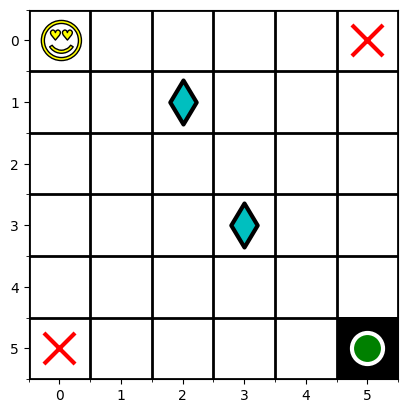

In [88]:
# Prototype of My Environment
my_grid_width = 6
my_grid_height = 6
grid = np.zeros((my_grid_height, my_grid_width))
start_pos = [0, 0]
reward_pos_1 = [3,3]
reward_pos_2 = [1,2]
reward_pos_3 = [5,0]
reward_pos_4 = [0,5]
end_pos = [5, 5]
grid[tuple(start_pos)] = 0
grid[tuple(end_pos)] = 1
figure, axes = plt.subplots()
axes.set_xticks(np.arange(-0.5, my_grid_width, 1), minor=True)
axes.set_yticks(np.arange(-0.5, my_grid_height, 1), minor=True)
axes.grid(which='minor', color='black', linestyle='-', linewidth=2)
axes.imshow(grid, cmap='binary', interpolation='nearest')
axes.scatter(end_pos[1],end_pos[0], marker='o',edgecolors='white',linewidths=3, color='g', s=500, alpha=1)
axes.scatter(reward_pos_1[1], reward_pos_1[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
axes.scatter(reward_pos_2[1], reward_pos_2[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
axes.scatter(reward_pos_3[1],reward_pos_3[0], marker='x', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
axes.scatter(reward_pos_4[1], reward_pos_4[0], marker='x', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
axes.scatter(start_pos[1], start_pos[0], marker='$\U0001F60D$',edgecolors='k',linewidths=1, color='yellow', s=1000, alpha=1)
plt.show()

In [89]:
class Deterministic_Environment(gym.Env):
    metadata = { 'render.modes': [] }
    def __init__(self):
      self.observation_space = spaces.Discrete(36)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = 10
      self.timestep = 0
      self.agent_pos = [0, 0]
      self.reward_pos_1 = [3,3]
      self.reward_pos_2 = [1,2]
      self.reward_pos_3 = [5,0]
      self.reward_pos_4 = [0,5]
      self.goal_pos = [5, 5]
      self.state = np.zeros((6,6))
      self.state[tuple(self.agent_pos)] = 111
      self.state[tuple(self.goal_pos)] = 888

    def reset(self, **kwargs):
      self.agent_pos = [0, 0]
      self.reward_pos_1 = [3,3]
      self.reward_pos_2 = [1,2]
      self.reward_pos_3 = [5,0]
      self.reward_pos_4 = [0,5]
      self.goal_pos = [5, 5]
      self.state = np.zeros((6,6))
      self.state[tuple(self.agent_pos)] = 111
      self.state[tuple(self.goal_pos)] = 888
      observation = self.state.flatten()
      info = {}
      return observation

    def step(self, action):
      if action == 0: #Down
        self.agent_pos[0] += 1
      elif action == 1: #Up
        self.agent_pos[0] -= 1
      elif action == 2: #Right
        self.agent_pos[1] += 1
      elif action == 3: #Left
        self.agent_pos[1] -= 1
      self.agent_pos = np.clip(self.agent_pos, 0, 5)
      self.state = np.zeros((6,6))
      self.state[tuple(self.agent_pos)] = 111
      self.state[tuple(self.goal_pos)] = 888
      print("Current State:", self.state)
      observation = self.state.flatten()
      reward = 0
      truncated = False
      if np.array_equal(self.agent_pos, self.goal_pos):
        terminated = True
        reward = 10
      else:
        terminated = False
        reward = 0
      if np.array_equal(self.agent_pos, self.reward_pos_1) or np.array_equal(self.agent_pos, self.reward_pos_2):
        reward = 1
      elif np.array_equal(self.agent_pos, self.reward_pos_3) or np.array_equal(self.agent_pos, self.reward_pos_4):
        reward = -1
      self.timestep += 1
      if self.timestep >= self.max_timesteps:
            terminated = True
      if np.all((np.asarray(self.agent_pos) >=0 ) & (np.asarray(self.agent_pos) <= 5)):
        truncated = True
        reward = -1
      else:
        truncated = False
      return observation, reward, terminated, truncated

    def render(self,agent_actions,ax=None):
      if ax is None:
        fig, ax = plt.subplots()
      my_grid_width = 6
      my_grid_height = 6
      grid = np.zeros((my_grid_height, my_grid_width))
      grid[tuple(self.goal_pos)] = 1
      grid[tuple(self.reward_pos_1)] = 0.5
      grid[tuple(self.reward_pos_2)] = 0.5
      grid[tuple(self.reward_pos_3)] = -0.5
      grid[tuple(self.reward_pos_4)] = -0.5
      for a_position in agent_actions:
        grid[tuple(a_position)] = 0
      ax.set_xticks(np.arange(-0.5, my_grid_width, 1), minor=True)
      ax.set_yticks(np.arange(-0.5, my_grid_height, 1), minor=True)
      ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
      ax.imshow(grid, cmap='binary', interpolation='nearest')
      ax.scatter(self.goal_pos[1], self.goal_pos[0], marker='o',edgecolors='white',linewidths=3, color='g', s=500, alpha=1)
      ax.scatter(self.reward_pos_1[1], self.reward_pos_1[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
      ax.scatter(self.reward_pos_2[1], self.reward_pos_2[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
      ax.scatter(self.reward_pos_3[1], self.reward_pos_3[0], marker='X', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
      ax.scatter(self.reward_pos_4[1], self.reward_pos_4[0], marker='X', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
      ax.scatter(agent_actions[-1][1], agent_actions[-1][0], marker='$\U0001F60D$',edgecolors='k',linewidths=1, color='yellow', s=1000, alpha=1)
      plt.show()


Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 1
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


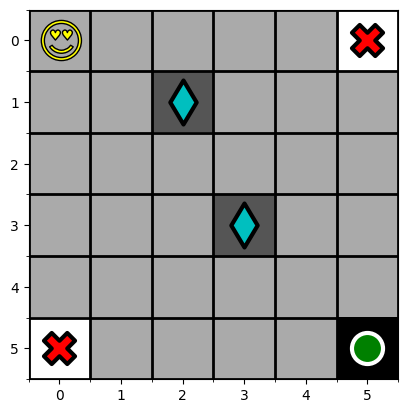

Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 3
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


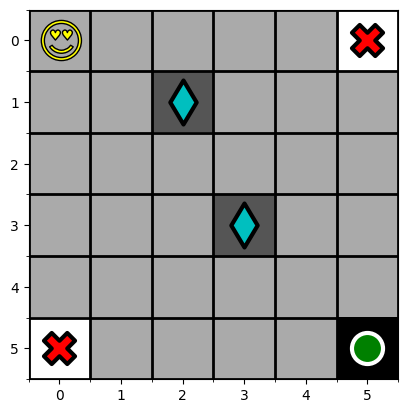

Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 3
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


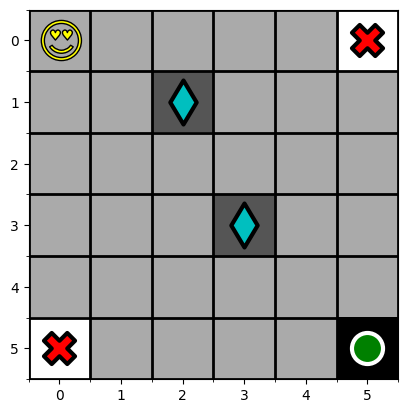

Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 2
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


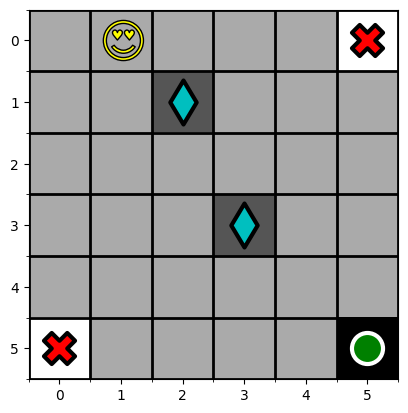

Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 3
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


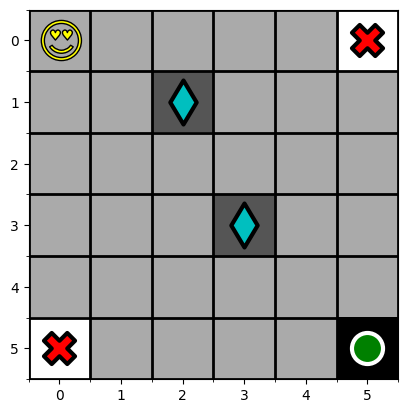

Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 1
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


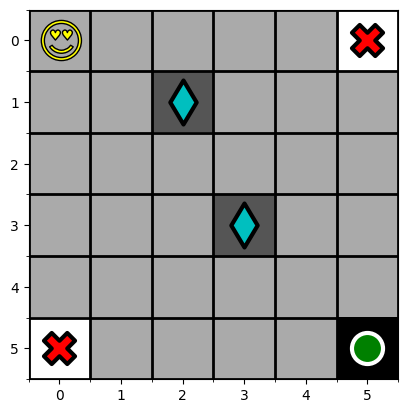

Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 0
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


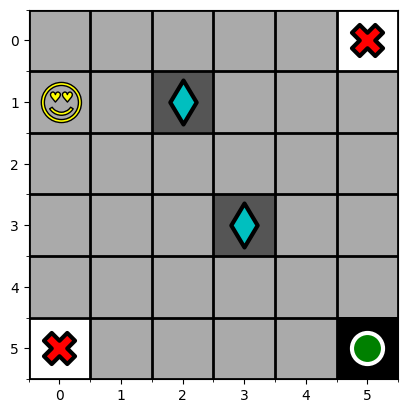

Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 1
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


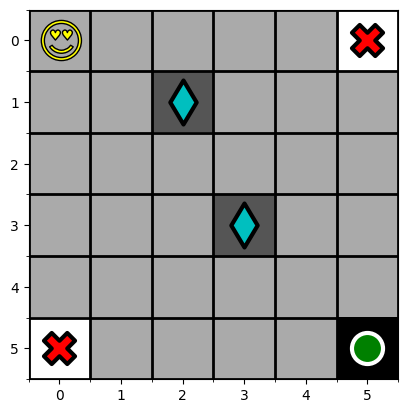

Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 0
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


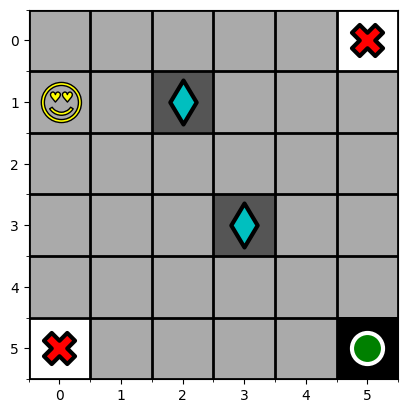

Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 2
Reward Gained: -1
Game Over: True
Agent is within the Grid: True
Sorry! You have reached the maximum timesteps


In [90]:
class Random_Agent_Action:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
  def step(self, obs):
    return np.random.choice(self.action_space.n)

my_env_1 = Deterministic_Environment()
user_agent = Random_Agent_Action(my_env_1)
terminated, truncated = False, False
obs = my_env_1.reset()
agent_actions = []
while not terminated:
    a_move = user_agent.step(obs)
    observation, reward, terminated, truncated = my_env_1.step(a_move)
    print("Chosen Action:", a_move)
    print("Reward Gained:", reward)
    print("Game Over:", terminated)
    print("Agent is within the Grid:", truncated)
    if terminated != True:
      agent_actions.append((my_env_1.agent_pos[0], my_env_1.agent_pos[1]))
      time.sleep(0.5)
      my_env_1.render(agent_actions)
    else:
      print("Sorry! You have reached the maximum timesteps")
      my_env_1.reset()

**1.2. Stochastic Environment**

In [32]:
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

In [91]:
class Stochastic_Environment(gym.Env):
    metadata = { 'render.modes': [] }
    def __init__(self,stochastic_action=0.05):
      self.observation_space = spaces.Discrete(36)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = 10
      self.timestep = 0
      self.agent_pos = [0, 0]
      self.reward_pos_1 = [3,3]
      self.reward_pos_2 = [1,2]
      self.reward_pos_3 = [5,0]
      self.reward_pos_4 = [0,5]
      self.goal_pos = [5, 5]
      self.state = np.zeros((6,6))
      self.state[tuple(self.agent_pos)] = 111
      self.state[tuple(self.goal_pos)] = 888
      self.stochastic_action = stochastic_action

    def reset(self, **kwargs):
      self.agent_pos = [0, 0]
      self.reward_pos_1 = [3,3]
      self.reward_pos_2 = [1,2]
      self.reward_pos_3 = [5,0]
      self.reward_pos_4 = [0,5]
      self.goal_pos = [5, 5]
      self.state = np.zeros((6,6))
      self.state[tuple(self.agent_pos)] = 111
      self.state[tuple(self.goal_pos)] = 888
      observation = self.state.flatten()
      info = {}
      return observation

    def step(self, action):
      if np.random.rand() < self.stochastic_action:
        alternate_action = [act for act in range(self.action_space.n) if act != action]
        action = np.random.choice(alternate_action)
        print("Its a Stochastic Move")
        print("Alternate Action", action)
      if action == 0: #Down
        self.agent_pos[0] += 1
      elif action == 1: #Up
        self.agent_pos[0] -= 1
      elif action == 2: #Right
        self.agent_pos[1] += 1
      elif action == 3: #Left
        self.agent_pos[1] -= 1
      self.agent_pos = np.clip(self.agent_pos, 0, 5)
      self.state = np.zeros((6,6))
      self.state[tuple(self.agent_pos)] = 111
      self.state[tuple(self.goal_pos)] = 888
      print("Current State:", self.state)
      observation = self.state.flatten()
      reward = 0
      truncated = False
      if np.array_equal(self.agent_pos, self.goal_pos):
        terminated = True
        reward = 10
      else:
        terminated = False
        reward = 0
      if np.array_equal(self.agent_pos, self.reward_pos_1) or np.array_equal(self.agent_pos, self.reward_pos_2):
        reward = 1
      elif np.array_equal(self.agent_pos, self.reward_pos_3) or np.array_equal(self.agent_pos, self.reward_pos_4):
        reward = -1
      self.timestep += 1
      if self.timestep >= self.max_timesteps:
            terminated = True
      if np.all((np.asarray(self.agent_pos) >=0 ) & (np.asarray(self.agent_pos) <= 5)):
        truncated = True
        reward = -1
      else:
        truncated = False
      return observation, reward, terminated, truncated

    def render(self,agent_actions,ax=None):
      if ax is None:
        fig, ax = plt.subplots()
      my_grid_width = 6
      my_grid_height = 6
      grid = np.zeros((my_grid_height, my_grid_width))
      grid[tuple(self.goal_pos)] = 1
      grid[tuple(self.reward_pos_1)] = 0.5
      grid[tuple(self.reward_pos_2)] = 0.5
      grid[tuple(self.reward_pos_3)] = -0.5
      grid[tuple(self.reward_pos_4)] = -0.5
      for a_position in agent_actions:
        grid[tuple(a_position)] = 0
      ax.set_xticks(np.arange(-0.5, my_grid_width, 1), minor=True)
      ax.set_yticks(np.arange(-0.5, my_grid_height, 1), minor=True)
      ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
      ax.imshow(grid, cmap='binary', interpolation='nearest')
      ax.scatter(self.goal_pos[1], self.goal_pos[0], marker='o',edgecolors='white',linewidths=3, color='g', s=500, alpha=1)
      ax.scatter(self.reward_pos_1[1], self.reward_pos_1[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
      ax.scatter(self.reward_pos_2[1], self.reward_pos_2[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
      ax.scatter(self.reward_pos_3[1], self.reward_pos_3[0], marker='X', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
      ax.scatter(self.reward_pos_4[1], self.reward_pos_4[0], marker='X', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
      ax.scatter(agent_actions[-1][1], agent_actions[-1][0], marker='$\U0001F60D$',edgecolors='k',linewidths=1, color='yellow', s=1000, alpha=1)
      plt.show()


Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 3
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


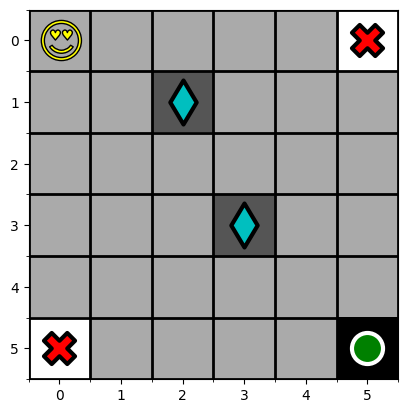

Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 0
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


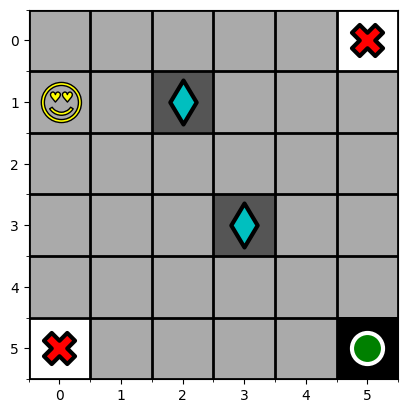

Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 3
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


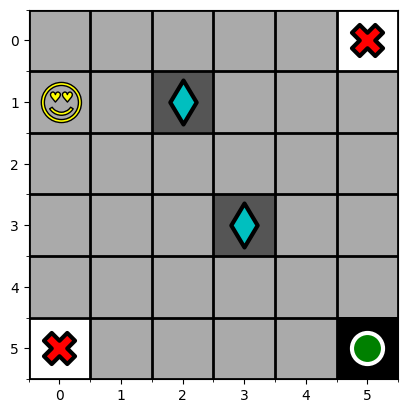

Its a Stochastic Move
Alternate Action 2
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 0
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


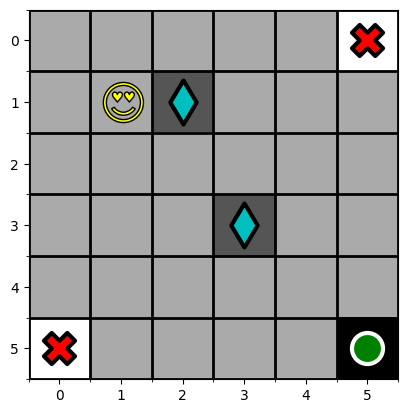

Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 3
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


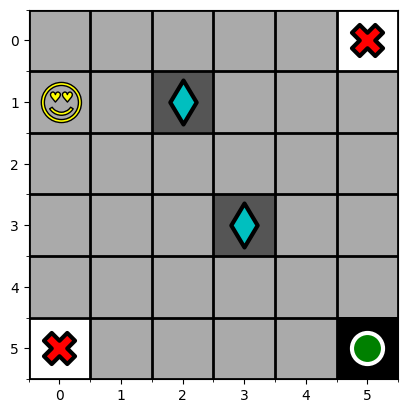

Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 1
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


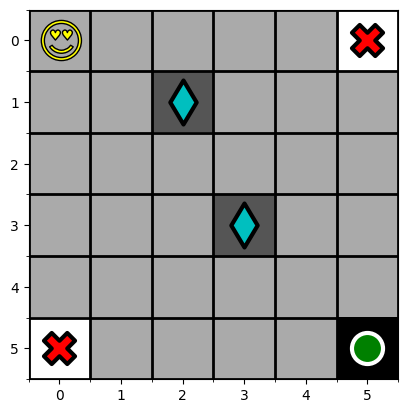

Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 1
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


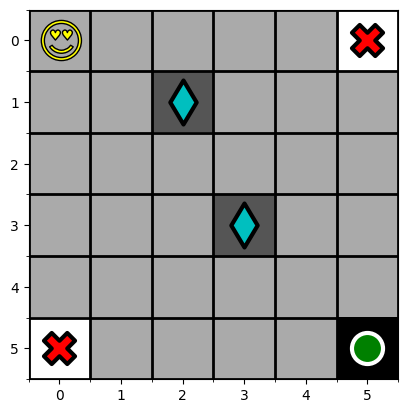

Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 1
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


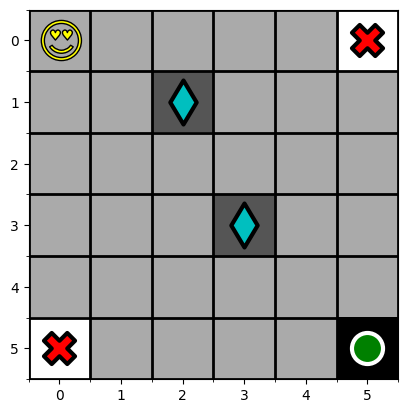

Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 3
Reward Gained: -1
Game Over: False
Agent is within the Grid: True


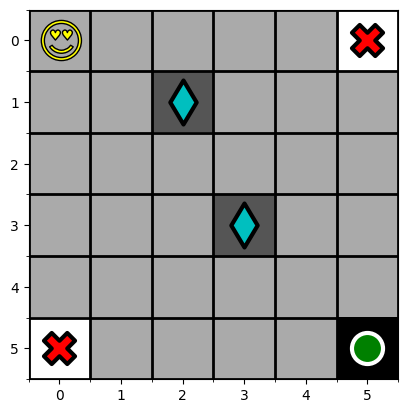

Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Chosen Action: 1
Reward Gained: -1
Game Over: True
Agent is within the Grid: True
Sorry! You have reached the maximum timesteps


In [92]:
class Random_Agent_Action:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
  def step(self, obs):
    return np.random.choice(self.action_space.n)

my_env_2 = Stochastic_Environment()
user_agent = Random_Agent_Action(my_env_2)
terminated, truncated = False, False
obs = my_env_2.reset()
agent_actions = []
while not terminated:
    a_move = user_agent.step(obs)
    observation, reward, terminated, truncated = my_env_2.step(a_move)
    print("Chosen Action:", a_move)
    print("Reward Gained:", reward)
    print("Game Over:", terminated)
    print("Agent is within the Grid:", truncated)
    if terminated != True:
      agent_actions.append((my_env_2.agent_pos[0], my_env_2.agent_pos[1]))
      time.sleep(0.5)
      my_env_2.render(agent_actions)
    else:
      print("Sorry! You have reached the maximum timesteps")
      my_env_2.reset()

### Task 2
**2.1. Q-Learning**
(For Deterministic Environment)


In [38]:
import pickle
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict
import pandas as pd


class Deterministic_Environment(gym.Env):
    metadata = { 'render.modes': [] }
    def __init__(self):
      self.observation_space = spaces.Discrete(36)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = 200
      self.timestep = 0
      self.agent_pos = [0, 0]
      self.reward_pos_1 = [3,3]
      self.reward_pos_2 = [1,2]
      self.reward_pos_3 = [5,0]
      self.reward_pos_4 = [0,5]
      self.goal_pos = [5, 5]
      self.state = np.zeros((6,6))
      self.state[tuple(self.agent_pos)] = 111
      self.state[tuple(self.goal_pos)] = 888

    def reset(self, **kwargs):
      self.agent_pos = [0, 0]
      self.reward_pos_1 = [3,3]
      self.reward_pos_2 = [1,2]
      self.reward_pos_3 = [5,0]
      self.reward_pos_4 = [0,5]
      self.goal_pos = [5, 5]
      self.timestep = 0
      self.state = np.zeros((6,6))
      self.state[tuple(self.agent_pos)] = 111
      self.state[tuple(self.goal_pos)] = 888
      observation = self.state.flatten()
      return observation

    def step(self, action):
      if action == 0: #Down
        self.agent_pos[0] += 1
      elif action == 1: #Up
        self.agent_pos[0] -= 1
      elif action == 2: #Right
        self.agent_pos[1] += 1
      elif action == 3: #Left
        self.agent_pos[1] -= 1
      self.agent_pos = np.clip(self.agent_pos, 0, 5)
      self.state = np.zeros((6,6))
      self.state[tuple(self.agent_pos)] = 111
      self.state[tuple(self.goal_pos)] = 888
      print("Current State:", self.state)
      observation = self.state.flatten()
      reward = 0
      truncated = False
      if np.array_equal(self.agent_pos, self.goal_pos):
        terminated = True
        reward = 10
      else:
        terminated = False
        reward = 0
        if np.array_equal(self.agent_pos, self.reward_pos_1) or np.array_equal(self.agent_pos, self.reward_pos_2):
          reward = 1
        elif np.array_equal(self.agent_pos, self.reward_pos_3) or np.array_equal(self.agent_pos, self.reward_pos_4):
          reward = -1
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
          terminated = True
        if np.all((np.asarray(self.agent_pos) >=0 ) & (np.asarray(self.agent_pos) <= 5)):
          truncated = True
          reward = -1
        else:
          truncated = False
      return observation, reward, terminated, truncated

    def render(self,agent_actions,ax=None):
      if ax is None:
        fig, ax = plt.subplots()
      my_grid_width = 6
      my_grid_height = 6
      grid = np.zeros((my_grid_height, my_grid_width))
      grid[tuple(self.goal_pos)] = 1
      grid[tuple(self.reward_pos_1)] = 0.5
      grid[tuple(self.reward_pos_2)] = 0.5
      grid[tuple(self.reward_pos_3)] = -0.5
      grid[tuple(self.reward_pos_4)] = -0.5
      for a_position in agent_actions:
        grid[tuple(a_position)] = 0
      ax.set_xticks(np.arange(-0.5, my_grid_width, 1), minor=True)
      ax.set_yticks(np.arange(-0.5, my_grid_height, 1), minor=True)
      ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
      ax.imshow(grid, cmap='binary', interpolation='nearest')
      ax.scatter(self.goal_pos[1], self.goal_pos[0], marker='o',edgecolors='white',linewidths=3, color='g', s=500, alpha=1)
      ax.scatter(self.reward_pos_1[1], self.reward_pos_1[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
      ax.scatter(self.reward_pos_2[1], self.reward_pos_2[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
      ax.scatter(self.reward_pos_3[1], self.reward_pos_3[0], marker='X', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
      ax.scatter(self.reward_pos_4[1], self.reward_pos_4[0], marker='X', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
      ax.scatter(agent_actions[-1][1], agent_actions[-1][0], marker='$\U0001F60D$',edgecolors='k',linewidths=1, color='yellow', s=1000, alpha=1)
      plt.show()

def Q_logic_d(env, num_of_episodes, gamma, alpha=0.1):
    epsilon_initial = 1
    epsilon_final = 0.01
    epsilon_decay_rate = (epsilon_final / epsilon_initial) ** (1 / num_of_episodes)
    D_epsilon_values = []
    new_epsilon = epsilon_initial
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards_gained_per_episode = []
    D_epsilon_values.append(new_epsilon)
    for episode in range(num_of_episodes):
        current_state = env.reset()
        done = False
        cummulative_reward = 0
        while not done:
            if np.random.rand() < new_epsilon:
                my_action = np.random.randint(env.action_space.n)
            else:
                my_action = np.argmax(Q[tuple(current_state)])
            next_state, reward, terminated, truncated = env.step(my_action)
            best_next_action = np.argmax(Q[tuple(next_state)])
            Q[tuple(current_state)][my_action] += alpha * (reward + gamma * Q[tuple(next_state)][best_next_action] - Q[tuple(current_state)][my_action])
            cummulative_reward += reward
            current_state = next_state
            if terminated == True:
                break
        rewards_gained_per_episode.append(cummulative_reward)
        if episode > 0:
          new_epsilon = new_epsilon * epsilon_decay_rate
          D_epsilon_values.append(new_epsilon)
    return dict(Q), rewards_gained_per_episode,D_epsilon_values
my_env_1 = Deterministic_Environment()
Q, D_rewards,D_epsilon_Values = Q_logic_d(my_env_1,5000,0.9)
with open('Deterministic_q_table.pkl', 'wb') as f:
    pickle.dump(Q, f)
# I am converting this for my reference.
with open('Deterministic_q_table.pkl', 'rb') as f:
    Q = pickle.load(f)
Q_df = pd.DataFrame.from_dict(Q, orient='index')
Q_df.to_csv('Deterministic_q_table.csv')



Streaming output truncated to the last 5000 lines.
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.

**2.1. Q-Learning**
(For Stochastic Environment)

In [39]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict

class Stochastic_Environment(gym.Env):
    metadata = { 'render.modes': [] }

    def __init__(self,stochastic_action=0.05):
        self.observation_space = spaces.Discrete(36)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 200
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.reward_pos_1 = [3,3]
        self.reward_pos_2 = [1,2]
        self.reward_pos_3 = [5,0]
        self.reward_pos_4 = [0,5]
        self.goal_pos = [5, 5]
        self.state = np.zeros((6,6))
        self.state[tuple(self.agent_pos)] = 111
        self.state[tuple(self.goal_pos)] = 888
        self.stochastic_action = stochastic_action
    def reset(self, **kwargs):
        self.agent_pos = [0, 0]
        self.timestep = 0
        self.state = np.zeros((6,6))
        self.state[tuple(self.agent_pos)] = 111
        self.state[tuple(self.goal_pos)] = 888
        observation = self.state.flatten()
        return observation
    def step(self, action):
        if np.random.rand() < self.stochastic_action:
            alternate_action = [act for act in range(self.action_space.n) if act != action]
            action = np.random.choice(alternate_action)
            print("Its a Stochastic Move")
            print("Alternate Action", action)
        if action == 0: #Down
            self.agent_pos[0] += 1
        elif action == 1: #Up
            self.agent_pos[0] -= 1
        elif action == 2: #Right
            self.agent_pos[1] += 1
        elif action == 3: #Left
            self.agent_pos[1] -= 1
        self.agent_pos = np.clip(self.agent_pos, 0, 5)
        self.state = np.zeros((6,6))
        self.state[tuple(self.agent_pos)] = 111
        self.state[tuple(self.goal_pos)] = 888
        print("Current State:", self.state)
        observation = self.state.flatten()
        reward = 0
        truncated = False
        if np.array_equal(self.agent_pos, self.goal_pos):
            terminated = True
            reward = 10
        else:
            terminated = False
            reward = 0
            if np.array_equal(self.agent_pos, self.reward_pos_1) or np.array_equal(self.agent_pos, self.reward_pos_2):
              reward = 1
            elif np.array_equal(self.agent_pos, self.reward_pos_3) or np.array_equal(self.agent_pos, self.reward_pos_4):
              reward = -1
            self.timestep += 1
            if self.timestep >= self.max_timesteps:
              terminated = True
            if np.all((np.asarray(self.agent_pos) >=0 ) & (np.asarray(self.agent_pos) <= 5)):
              truncated = True
              reward = -1
            else:
              truncated = False
        return observation, reward, terminated, truncated
    def render(self,agent_actions,ax=None):
        if ax is None:
            fig, ax = plt.subplots()
        my_grid_width = 6
        my_grid_height = 6
        grid = np.zeros((my_grid_height, my_grid_width))
        grid[tuple(self.goal_pos)] = 1
        grid[tuple(self.reward_pos_1)] = 0.5
        grid[tuple(self.reward_pos_2)] = 0.5
        grid[tuple(self.reward_pos_3)] = -0.5
        grid[tuple(self.reward_pos_4)] = -0.5
        for a_position in agent_actions:
            grid[tuple(a_position)] = 0
        ax.set_xticks(np.arange(-0.5, my_grid_width, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, my_grid_height, 1), minor=True)
        ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
        ax.imshow(grid, cmap='binary', interpolation='nearest')
        ax.scatter(self.goal_pos[1], self.goal_pos[0], marker='o',edgecolors='white',linewidths=3, color='g', s=500, alpha=1)
        ax.scatter(self.reward_pos_1[1], self.reward_pos_1[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
        ax.scatter(self.reward_pos_2[1], self.reward_pos_2[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
        ax.scatter(self.reward_pos_3[1], self.reward_pos_3[0], marker='X', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
        ax.scatter(self.reward_pos_4[1], self.reward_pos_4[0], marker='X', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
        ax.scatter(agent_actions[-1][1], agent_actions[-1][0], marker='$\U0001F60D$',edgecolors='k',linewidths=1, color='yellow', s=1000, alpha=1)
        plt.show()
def Q_logic_s(env, num_of_episodes, gamma, alpha=0.1):
    epsilon_initial = 1
    epsilon_final = 0.01
    epsilon_decay_rate = (epsilon_final / epsilon_initial) ** (1 / num_of_episodes)
    S_epsilon_values = []
    new_epsilon = epsilon_initial
    S_epsilon_values.append(new_epsilon)
    Q_initial = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards_gained_per_episode = []
    for episode in range(num_of_episodes):
        current_state = env.reset()
        done = False
        cumulative_reward = 0
        while not done:
            if np.random.rand() < new_epsilon:
                my_action = np.random.randint(env.action_space.n)
            else:
                my_action = np.argmax(Q_initial[tuple(current_state)])
            next_state, reward, terminated, _ = env.step(my_action)
            best_next_action = np.argmax(Q_initial[tuple(next_state)])
            Q_initial[tuple(current_state)][my_action] += alpha * (reward + gamma * Q_initial[tuple(next_state)][best_next_action] - Q_initial[tuple(current_state)][my_action])
            cumulative_reward += reward
            current_state = next_state
            if terminated:
                break
        if episode > 0:
          new_epsilon = new_epsilon * epsilon_decay_rate
          S_epsilon_values.append(new_epsilon)
        rewards_gained_per_episode.append(cumulative_reward)
    return Q_initial, rewards_gained_per_episode, S_epsilon_values
my_env_2 = Stochastic_Environment()
Q_updated, S_rewards, S_epsilon_values = Q_logic_s(my_env_2,5000, 0.9)
Q_updated_dictionary = {key: value for key, value in Q_updated.items()}
with open('Stochastic_q_table.pkl', 'wb') as f:
    pickle.dump(Q_updated_dictionary, f)
# I am using this for my reference
Q_df = pd.DataFrame.from_dict(Q_updated, orient='index')
Q_df.columns = ['Action 0', 'Action 1', 'Action 2', 'Action 3']
Q_df.to_csv('Stochastic_q_table.csv', index=False)


Streaming output truncated to the last 5000 lines.
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 111. 888.]]
Its a Stochastic Move
Alternate Action 1
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 111.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 111.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   

# Evaluation Results

Base model


Initial Table: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Deterministic Q-table [-2.25159022 -3.0264312  -2.25159022 -3.0264312 ]
Deterministic Q-table [-1.3906558  -2.25159022 -1.3906558  -3.0264312 ]
Deterministic Q-table [-0.434062   -1.3907121  -0.43416776 -2.25162486]
Deterministic Q-table [ 0.62882    -0.43573703  0.61712025 -1.39276236]
Deterministic Q-table [-0.434062   -2.25159022 -0.434062   -2.25159022]
Deterministic Q-table [-1.39071389 -3.02643703 -1.3906558  -2.25159082]
Deterministi

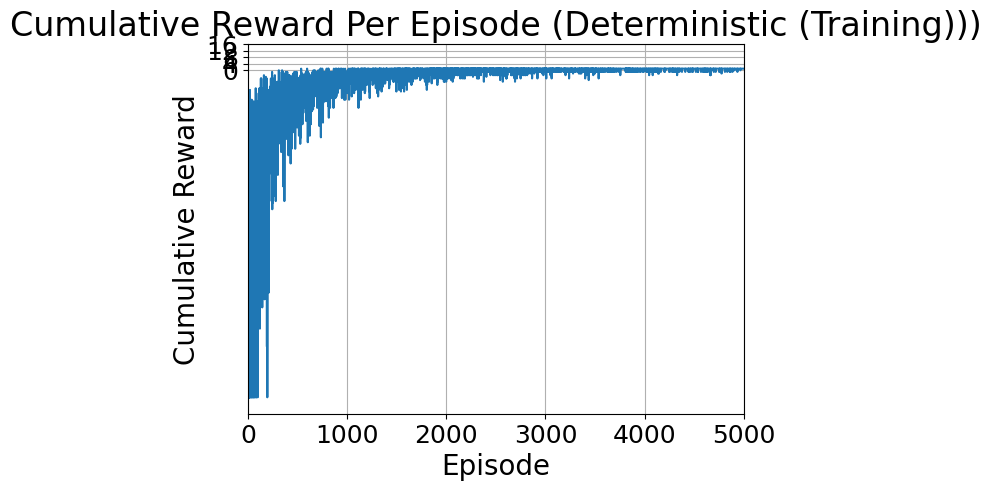

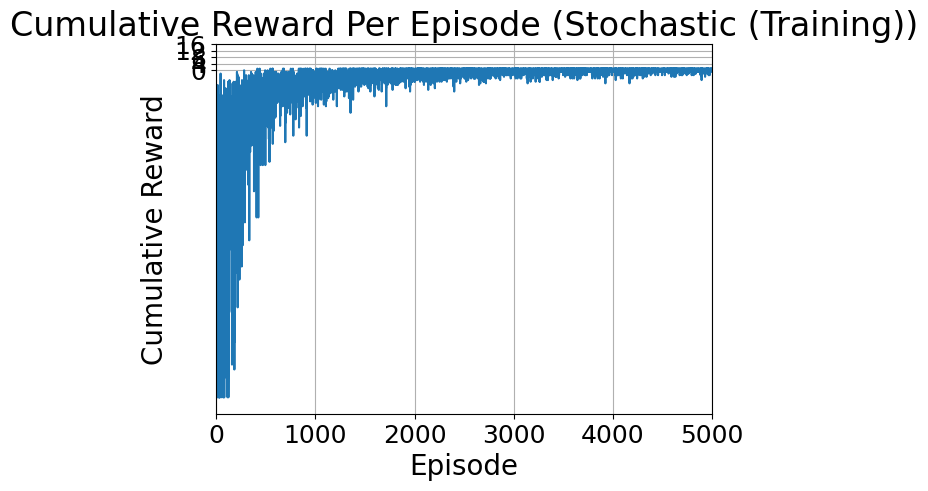

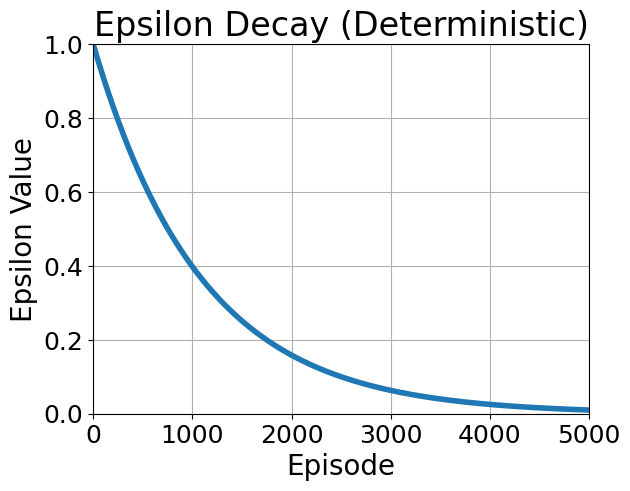

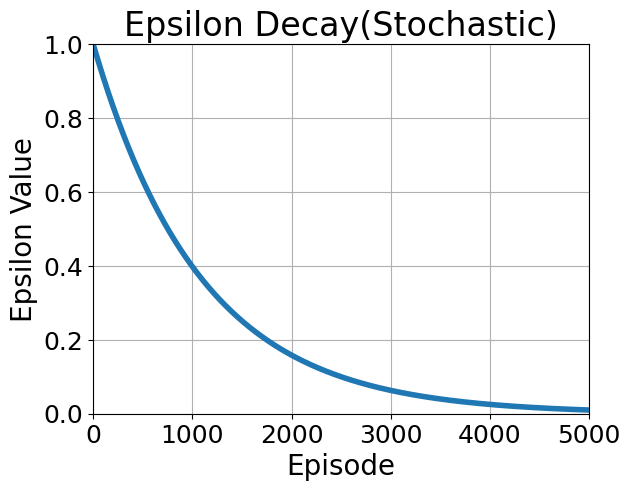

Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0

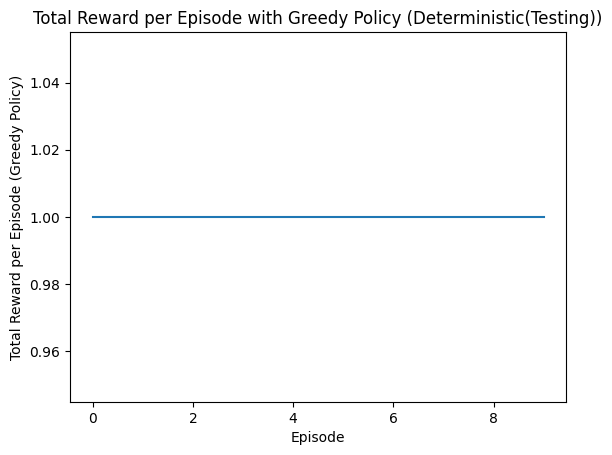

Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 111.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0

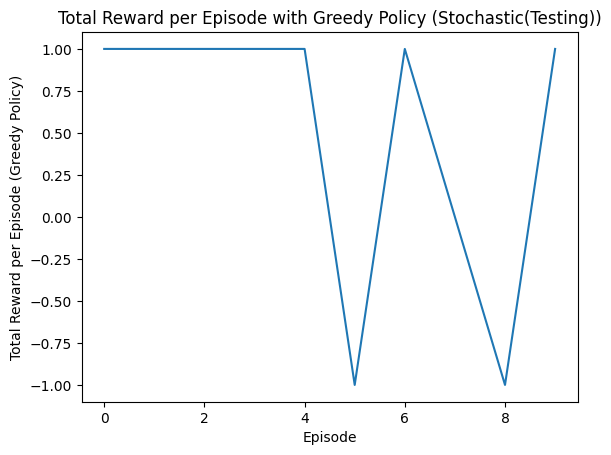

In [40]:

def my_greedy_policy(env, Q, num_episodes=10):
    rewards_per_episode = []
    end_loop = 0
    while end_loop < num_episodes:
        total_reward = 0
        state = env.reset()
        if isinstance(state, int):
            state = (state,)
        while True:
            action = np.argmax(Q[tuple(state)])
            next_state, reward, terminated, _ = env.step(action)
            total_reward += reward
            state = next_state
            if terminated == True:
                break
        rewards_per_episode.append(total_reward)
        end_loop = end_loop + 1
    return rewards_per_episode
og_Q = np.zeros((36,4))
print("Initial Table:",og_Q)
for d_key, d_value in Q.items():
  print("Deterministic Q-table", d_value )
for s_key, s_value in Q_updated_dictionary.items():
  print("Stochastic Q-table", s_value)
# Deterministic Environment
plt.figure()
plt.plot(D_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Deterministic (Training)))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.xlim(xmin=0, xmax=5000)
plt.grid()
plt.show()
# Stochastic Environment
plt.figure()
plt.plot(S_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Stochastic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.xlim(xmin=0, xmax=5000)
plt.grid()
plt.show()
# Epsilon Decay Graph
# Deterministic Environment
plt.figure()
plt.plot(D_epsilon_Values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay (Deterministic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=5000)
plt.grid()
plt.show()
# Stochastic Environement
plt.figure()
plt.plot(S_epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay(Stochastic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=5000)
plt.grid()
plt.show()
# 10 Step verification
# Deterministic Environment
my_env_1 = Deterministic_Environment()
greedy_rewards = my_greedy_policy(my_env_1, Q)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Deterministic(Testing))')
plt.show()
#Stochastic Environment
my_env_2 = Stochastic_Environment()
greedy_rewards = my_greedy_policy(my_env_2, Q_updated)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Stochastic(Testing))')
plt.show()

number of episodes = 200

Streaming output truncated to the last 5000 lines.
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 111. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 

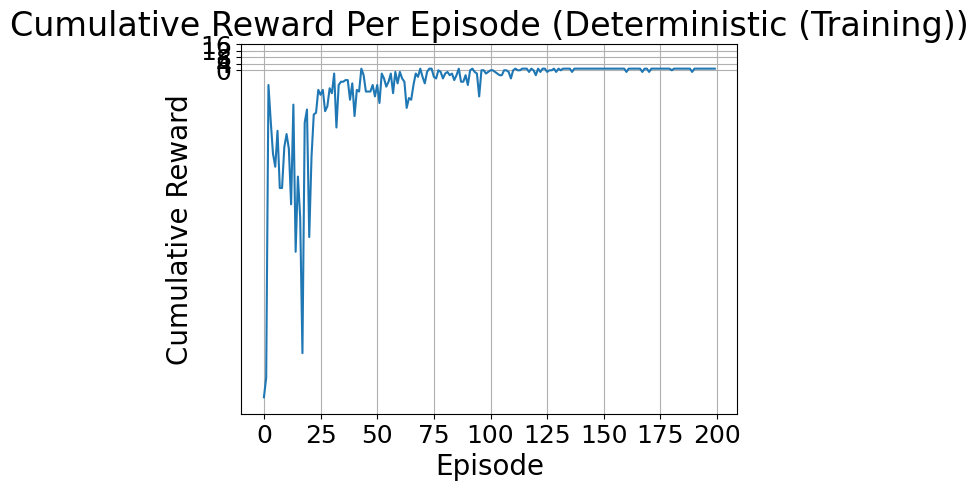

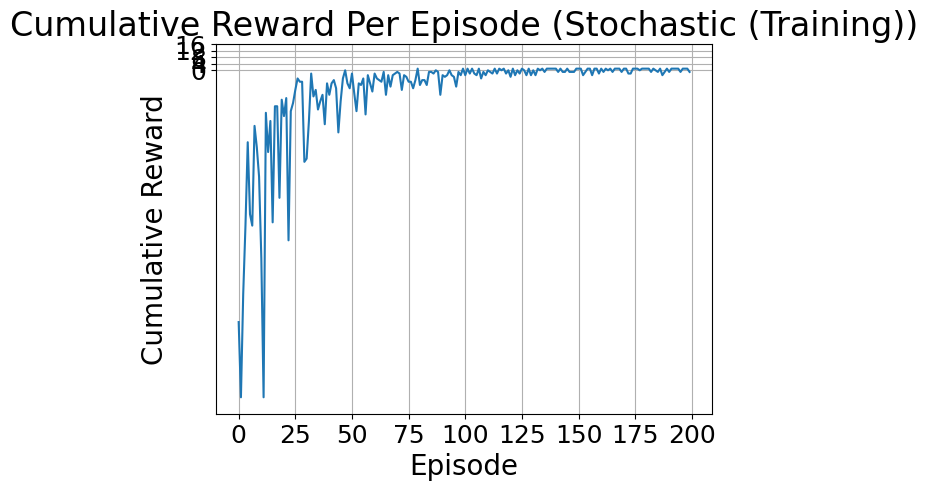

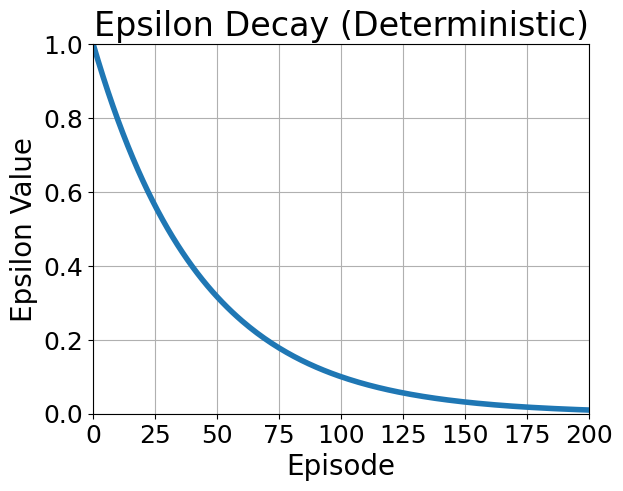

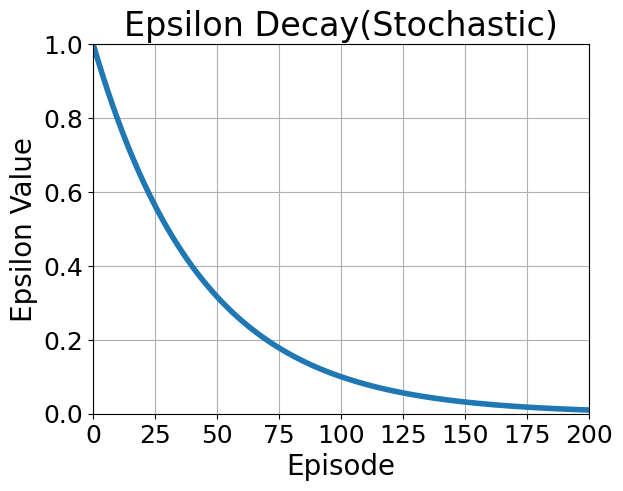

Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0

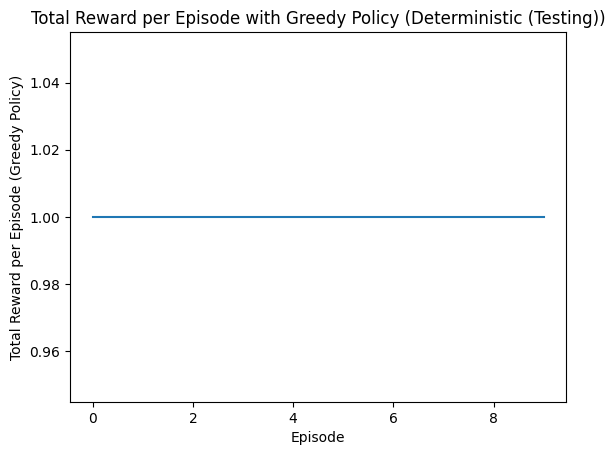

Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0

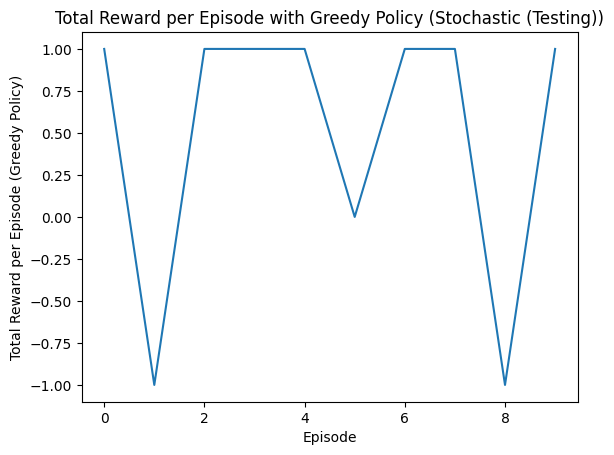

In [41]:
Q, D_rewards,D_epsilon_Values = Q_logic_d(my_env_1,200,0.9)
Q_updated, S_rewards, S_epsilon_values = Q_logic_s(my_env_2,200,0.9)
def my_greedy_policy(env, Q, num_episodes=10):
    rewards_per_episode = []
    end_loop = 0
    while end_loop < num_episodes:
        total_reward = 0
        state = env.reset()
        if isinstance(state, int):
            state = (state,)
        while True:
            action = np.argmax(Q[tuple(state)])
            next_state, reward, terminated, _ = env.step(action)
            total_reward += reward
            state = next_state
            if terminated == True:
                break
        rewards_per_episode.append(total_reward)
        end_loop = end_loop + 1
    return rewards_per_episode
og_Q = np.zeros((36,4))
print("Initial Table:",og_Q)
for d_key, d_value in Q.items():
  print("Deterministic Q-table", d_value )
for s_key, s_value in Q_updated_dictionary.items():
  print("Stochastic Q-table", s_value)
# Deterministic Environment
plt.figure()
plt.plot(D_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Deterministic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Stochastic Environment
plt.figure()
plt.plot(S_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Stochastic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Epsilon Decay Graph
# Deterministic Environment
plt.figure()
plt.plot(D_epsilon_Values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay (Deterministic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=200)
plt.grid()
plt.show()
# Stochastic Environement
plt.figure()
plt.plot(S_epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay(Stochastic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=200)
plt.grid()
plt.show()
# 10 Step verification
# Deterministic Environment
my_env_1 = Deterministic_Environment()
greedy_rewards = my_greedy_policy(my_env_1, Q)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Deterministic (Testing))')
plt.show()
#Stochastic Environment
my_env_2 = Stochastic_Environment()
greedy_rewards = my_greedy_policy(my_env_2, Q_updated)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Stochastic (Testing))')
plt.show()

number of episodes = 350

Streaming output truncated to the last 5000 lines.
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 111.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 

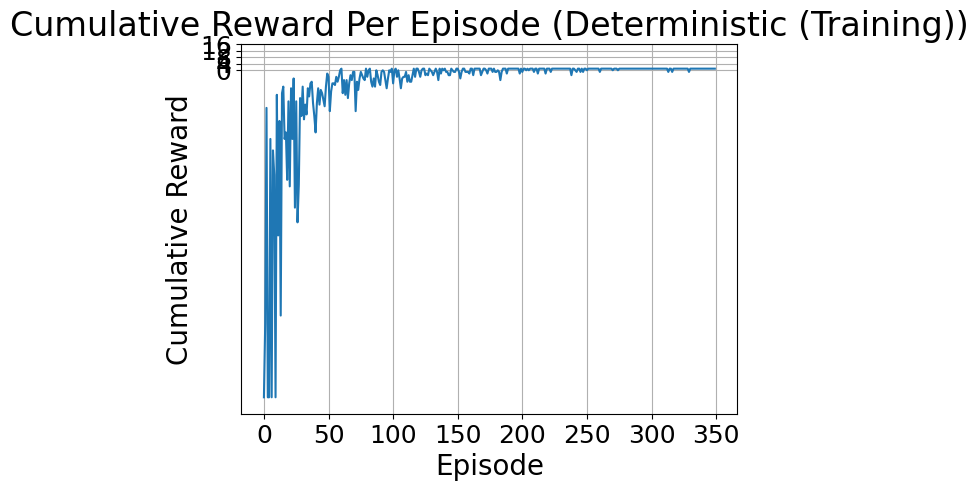

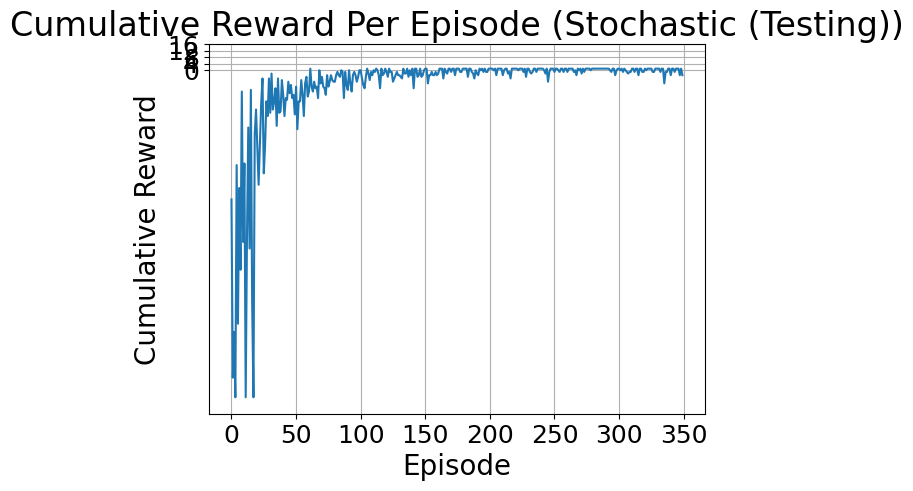

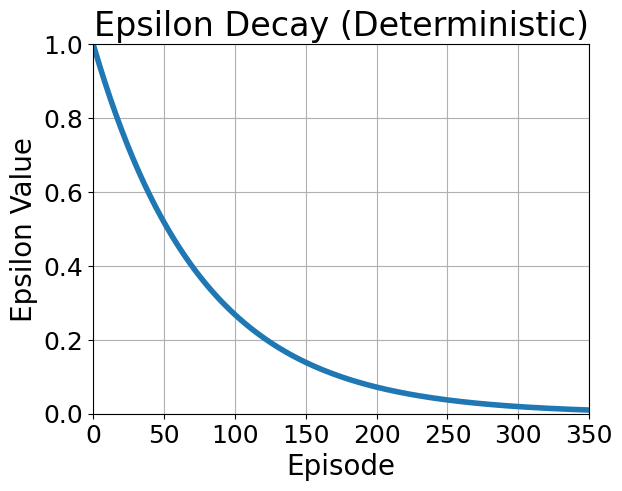

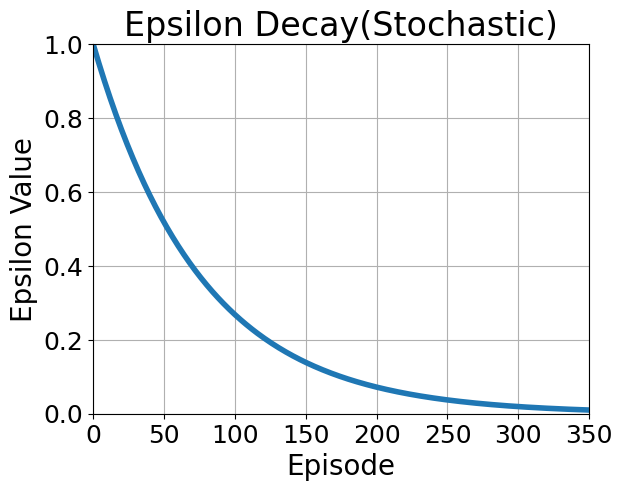

Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0

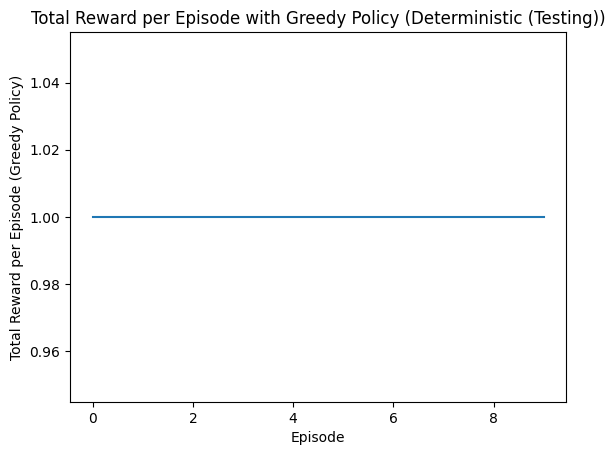

Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Its a Stochastic Move
Alternate Action 1
Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0. 

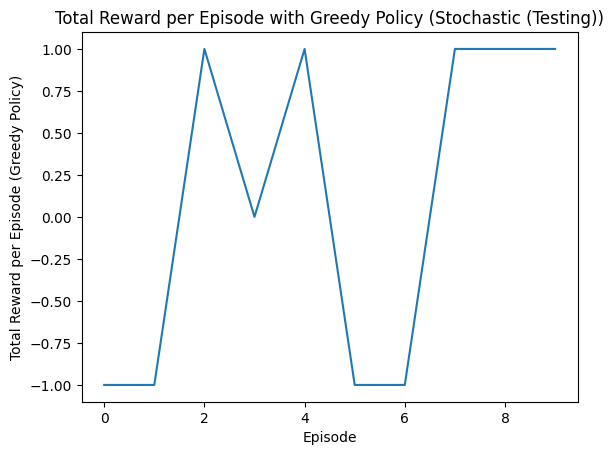

In [42]:
Q, D_rewards,D_epsilon_Values = Q_logic_d(my_env_1,350,0.9)
Q_updated, S_rewards, S_epsilon_values = Q_logic_s(my_env_2,350,0.9)
def my_greedy_policy(env, Q, num_episodes=10):
    rewards_per_episode = []
    end_loop = 0
    while end_loop < num_episodes:
        total_reward = 0
        state = env.reset()
        if isinstance(state, int):
            state = (state,)
        while True:
            action = np.argmax(Q[tuple(state)])
            next_state, reward, terminated, _ = env.step(action)
            total_reward += reward
            state = next_state
            if terminated == True:
                break
        rewards_per_episode.append(total_reward)
        end_loop = end_loop + 1
    return rewards_per_episode
og_Q = np.zeros((36,4))
print("Initial Table:",og_Q)
for d_key, d_value in Q.items():
  print("Deterministic Q-table", d_value )
for s_key, s_value in Q_updated_dictionary.items():
  print("Stochastic Q-table", s_value)
# Deterministic Environment
plt.figure()
plt.plot(D_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Deterministic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Stochastic Environment
plt.figure()
plt.plot(S_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Stochastic (Testing))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Epsilon Decay Graph
# Deterministic Environment
plt.figure()
plt.plot(D_epsilon_Values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay (Deterministic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=350)
plt.grid()
plt.show()
# Stochastic Environement
plt.figure()
plt.plot(S_epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay(Stochastic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=350)
plt.grid()
plt.show()
# 10 Step verification
# Deterministic Environment
my_env_1 = Deterministic_Environment()
greedy_rewards = my_greedy_policy(my_env_1, Q)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Deterministic (Testing))')
plt.show()
#Stochastic Environment
my_env_2 = Stochastic_Environment()
greedy_rewards = my_greedy_policy(my_env_2, Q_updated)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Stochastic (Testing))')
plt.show()

number of episodes = 50

Streaming output truncated to the last 5000 lines.
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.

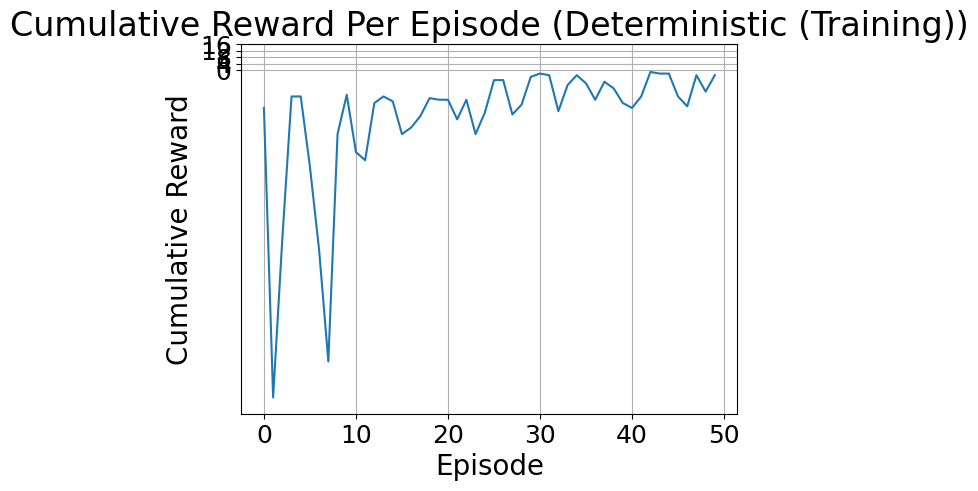

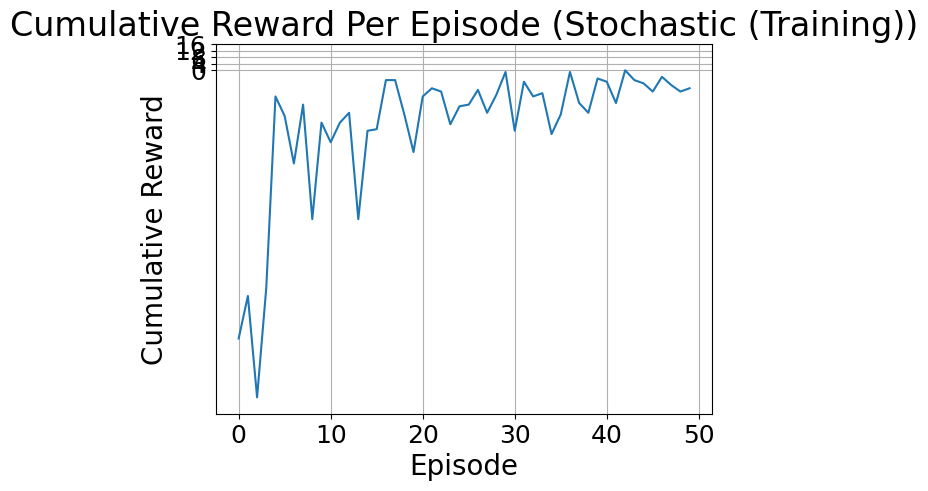

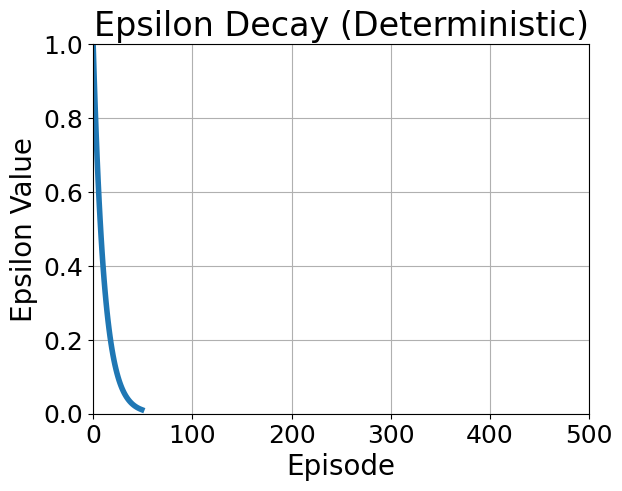

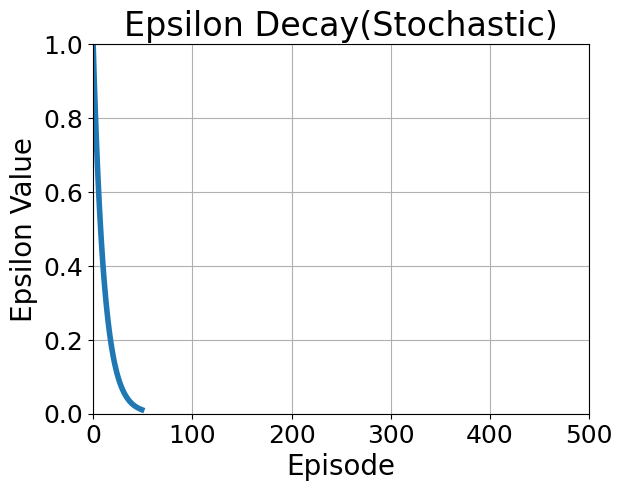

Streaming output truncated to the last 5000 lines.
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[111.   0.

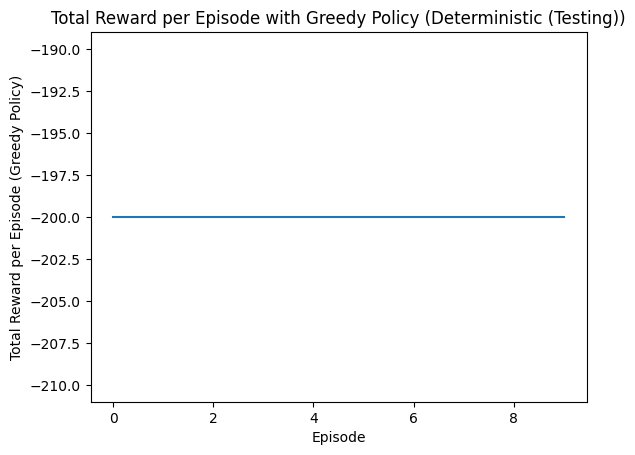

Streaming output truncated to the last 5000 lines.
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [111.   0. 

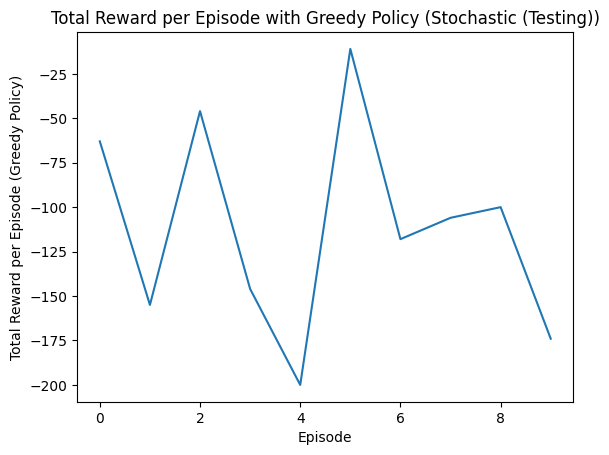

In [43]:
Q, D_rewards,D_epsilon_Values = Q_logic_d(my_env_1,50,0.9)
Q_updated, S_rewards, S_epsilon_values = Q_logic_s(my_env_2,50,0.9)
def my_greedy_policy(env, Q, num_episodes=10):
    rewards_per_episode = []
    end_loop = 0
    while end_loop < num_episodes:
        total_reward = 0
        state = env.reset()
        if isinstance(state, int):
            state = (state,)
        while True:
            action = np.argmax(Q[tuple(state)])
            next_state, reward, terminated, _ = env.step(action)
            total_reward += reward
            state = next_state
            if terminated == True:
                break
        rewards_per_episode.append(total_reward)
        end_loop = end_loop + 1
    return rewards_per_episode
og_Q = np.zeros((36,4))
print("Initial Table:",og_Q)
for d_key, d_value in Q.items():
  print("Deterministic Q-table", d_value )
for s_key, s_value in Q_updated_dictionary.items():
  print("Stochastic Q-table", s_value)
# Deterministic Environment
plt.figure()
plt.plot(D_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Deterministic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Stochastic Environment
plt.figure()
plt.plot(S_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Stochastic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Epsilon Decay Graph
# Deterministic Environment
plt.figure()
plt.plot(D_epsilon_Values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay (Deterministic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=50)
plt.grid()
plt.show()
# Stochastic Environement
plt.figure()
plt.plot(S_epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay(Stochastic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=50)
plt.grid()
plt.show()
# 10 Step verification
# Deterministic Environment
my_env_1 = Deterministic_Environment()
greedy_rewards = my_greedy_policy(my_env_1, Q)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Deterministic (Testing))')
plt.show()
#Stochastic Environment
my_env_2 = Stochastic_Environment()
greedy_rewards = my_greedy_policy(my_env_2, Q_updated)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Stochastic (Testing))')
plt.show()

gamma = 0.7


Streaming output truncated to the last 5000 lines.
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 

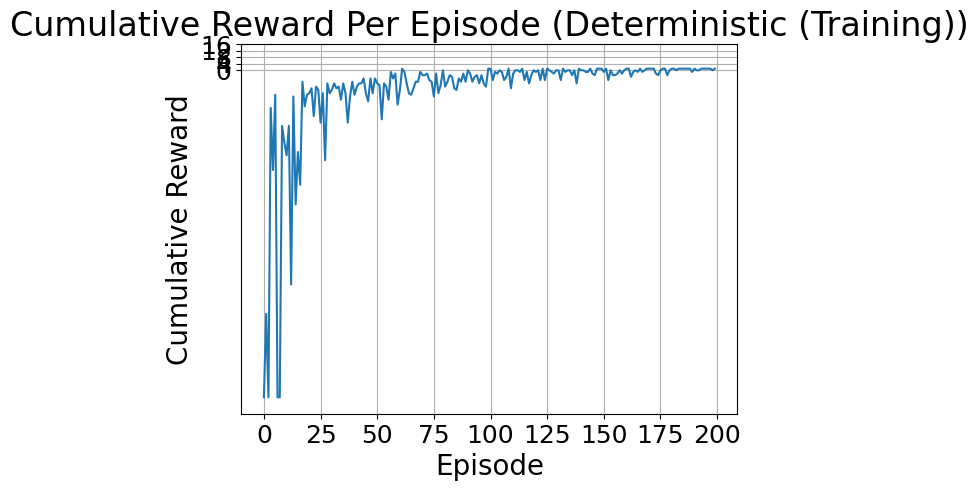

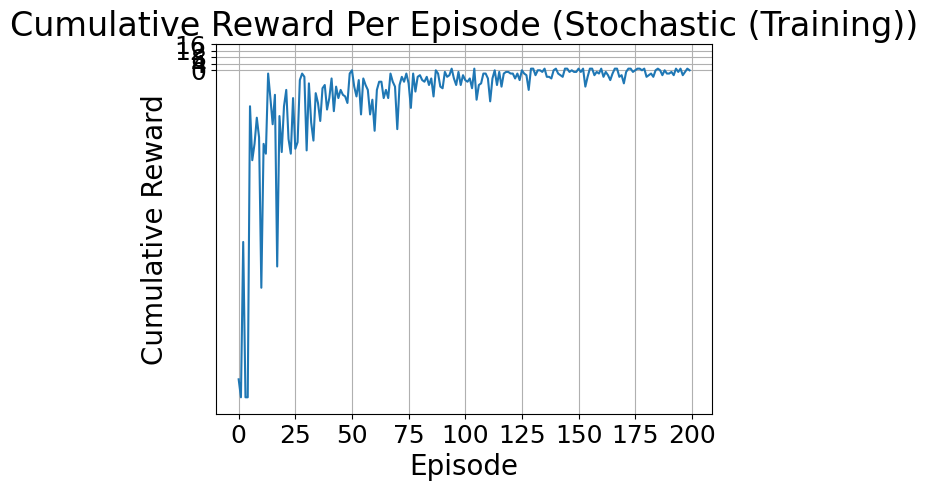

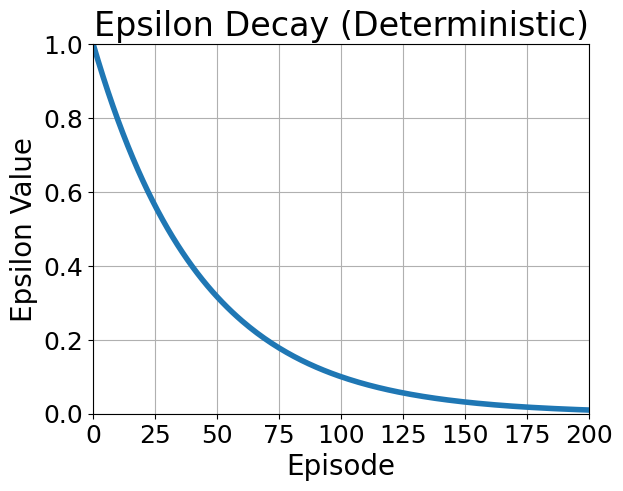

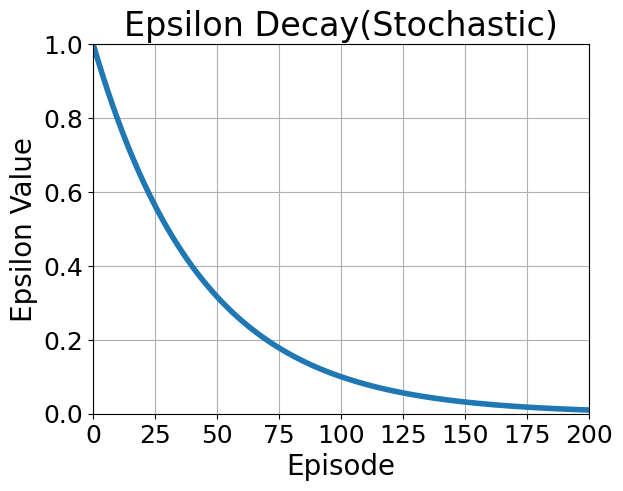

Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0

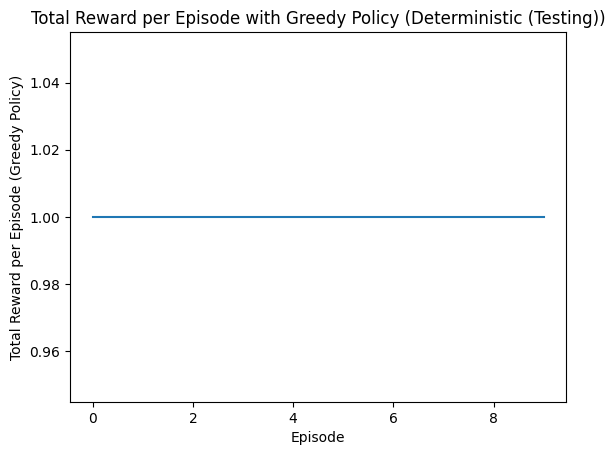

Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 111.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0

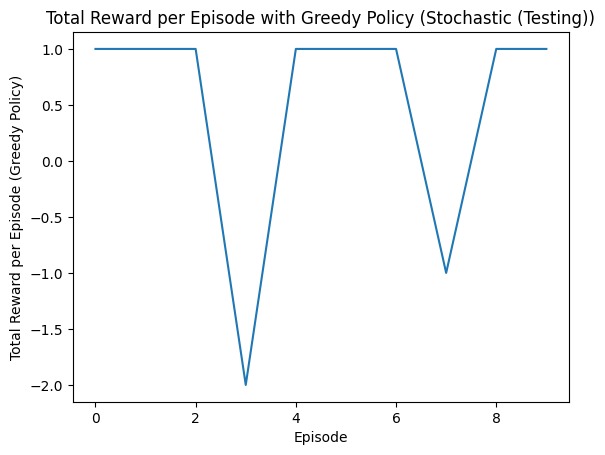

In [45]:
Q, D_rewards,D_epsilon_Values = Q_logic_d(my_env_1,200,0.7)
Q_updated, S_rewards, S_epsilon_values = Q_logic_s(my_env_2,200,0.7)
def my_greedy_policy(env, Q, num_episodes=10):
    rewards_per_episode = []
    end_loop = 0
    while end_loop < num_episodes:
        total_reward = 0
        state = env.reset()
        if isinstance(state, int):
            state = (state,)
        while True:
            action = np.argmax(Q[tuple(state)])
            next_state, reward, terminated, _ = env.step(action)
            total_reward += reward
            state = next_state
            if terminated == True:
                break
        rewards_per_episode.append(total_reward)
        end_loop = end_loop + 1
    return rewards_per_episode
og_Q = np.zeros((36,4))
print("Initial Table:",og_Q)
for d_key, d_value in Q.items():
  print("Deterministic Q-table", d_value )
for s_key, s_value in Q_updated_dictionary.items():
  print("Stochastic Q-table", s_value)
# Deterministic Environment
plt.figure()
plt.plot(D_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Deterministic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Stochastic Environment
plt.figure()
plt.plot(S_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Stochastic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Epsilon Decay Graph
# Deterministic Environment
plt.figure()
plt.plot(D_epsilon_Values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay (Deterministic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=200)
plt.grid()
plt.show()
# Stochastic Environement
plt.figure()
plt.plot(S_epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay(Stochastic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=200)
plt.grid()
plt.show()
# 10 Step verification
# Deterministic Environment
my_env_1 = Deterministic_Environment()
greedy_rewards = my_greedy_policy(my_env_1, Q)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Deterministic (Testing))')
plt.show()
#Stochastic Environment
my_env_2 = Stochastic_Environment()
greedy_rewards = my_greedy_policy(my_env_2, Q_updated)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Stochastic (Testing))')
plt.show()

gamma = 0.5

Streaming output truncated to the last 5000 lines.
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 

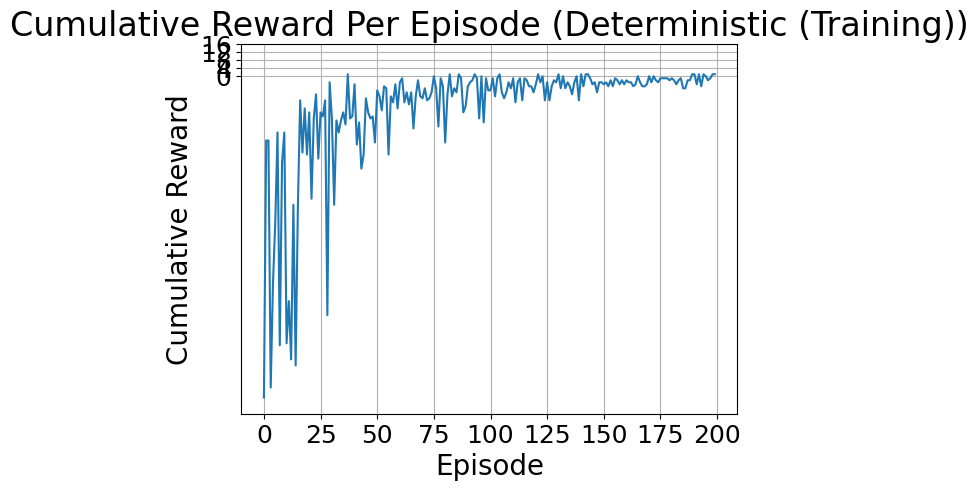

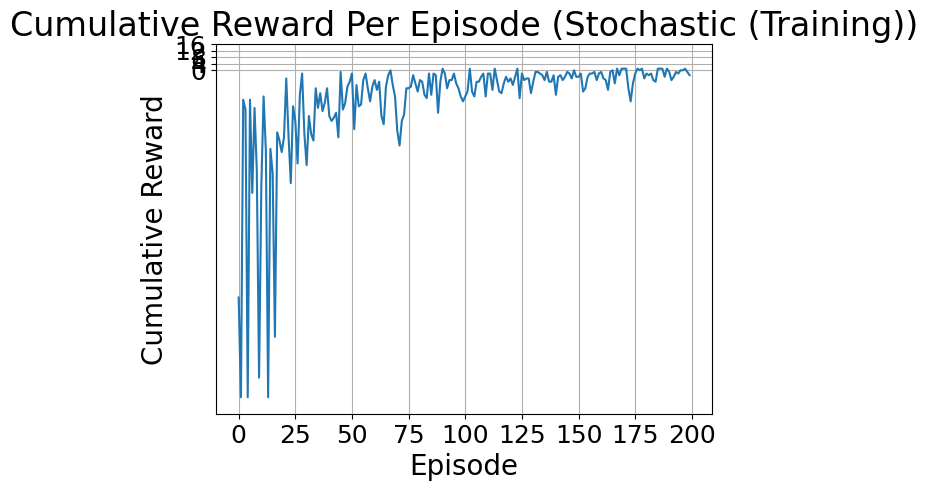

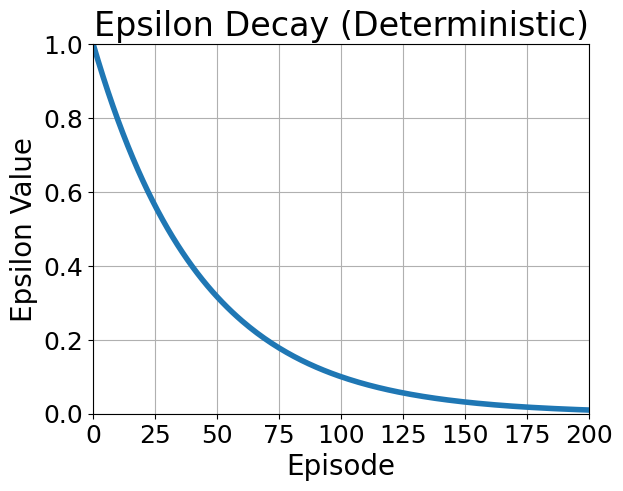

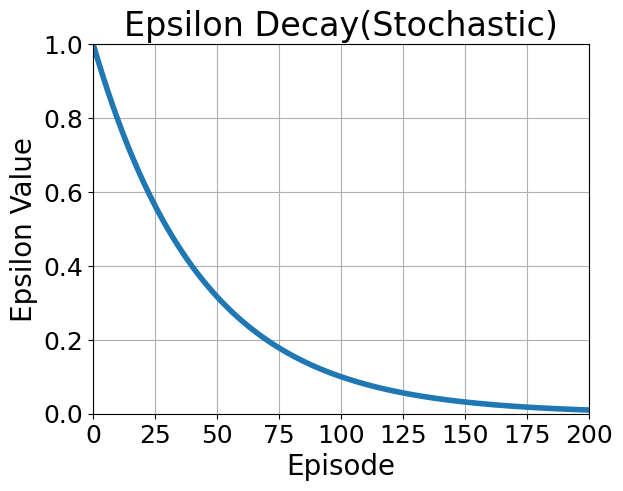

Streaming output truncated to the last 5000 lines.
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.

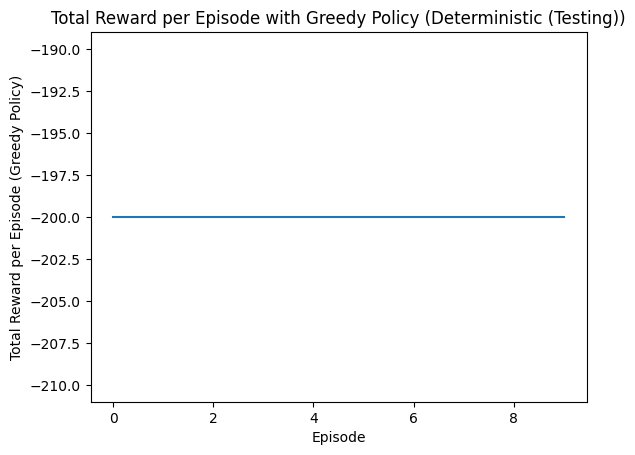

Its a Stochastic Move
Alternate Action 2
Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 

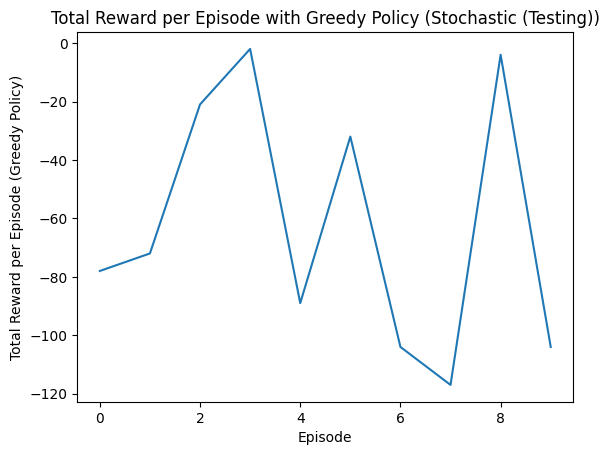

In [46]:
Q, D_rewards,D_epsilon_Values = Q_logic_d(my_env_1,200,0.5)
Q_updated, S_rewards, S_epsilon_values = Q_logic_s(my_env_2,200,0.5)
def my_greedy_policy(env, Q, num_episodes=10):
    rewards_per_episode = []
    end_loop = 0
    while end_loop < num_episodes:
        total_reward = 0
        state = env.reset()
        if isinstance(state, int):
            state = (state,)
        while True:
            action = np.argmax(Q[tuple(state)])
            next_state, reward, terminated, _ = env.step(action)
            total_reward += reward
            state = next_state
            if terminated == True:
                break
        rewards_per_episode.append(total_reward)
        end_loop = end_loop + 1
    return rewards_per_episode
og_Q = np.zeros((36,4))
print("Initial Table:",og_Q)
for d_key, d_value in Q.items():
  print("Deterministic Q-table", d_value )
for s_key, s_value in Q_updated_dictionary.items():
  print("Stochastic Q-table", s_value)
# Deterministic Environment
plt.figure()
plt.plot(D_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Deterministic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Stochastic Environment
plt.figure()
plt.plot(S_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Stochastic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Epsilon Decay Graph
# Deterministic Environment
plt.figure()
plt.plot(D_epsilon_Values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay (Deterministic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=200)
plt.grid()
plt.show()
# Stochastic Environement
plt.figure()
plt.plot(S_epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay(Stochastic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=200)
plt.grid()
plt.show()
# 10 Step verification
# Deterministic Environment
my_env_1 = Deterministic_Environment()
greedy_rewards = my_greedy_policy(my_env_1, Q)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Deterministic (Testing))')
plt.show()
#Stochastic Environment
my_env_2 = Stochastic_Environment()
greedy_rewards = my_greedy_policy(my_env_2, Q_updated)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Stochastic (Testing))')
plt.show()

gamma = 0.3

Streaming output truncated to the last 5000 lines.
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 

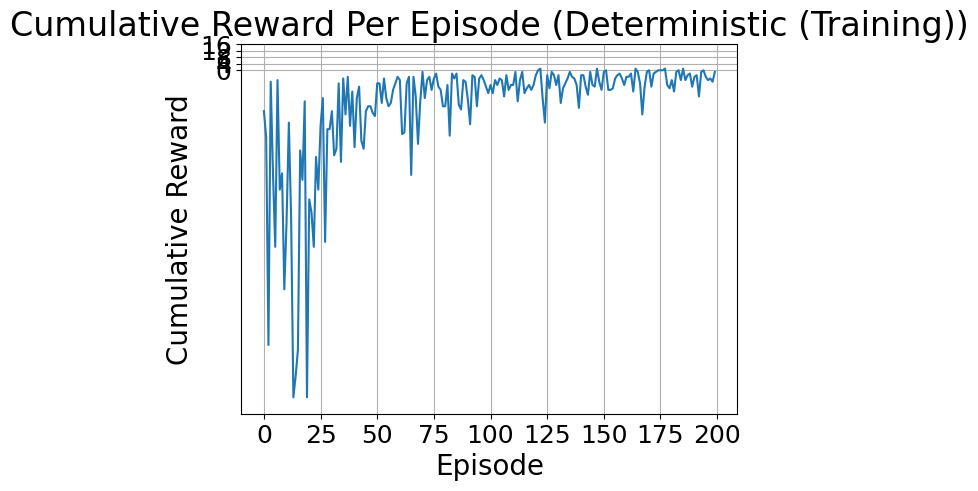

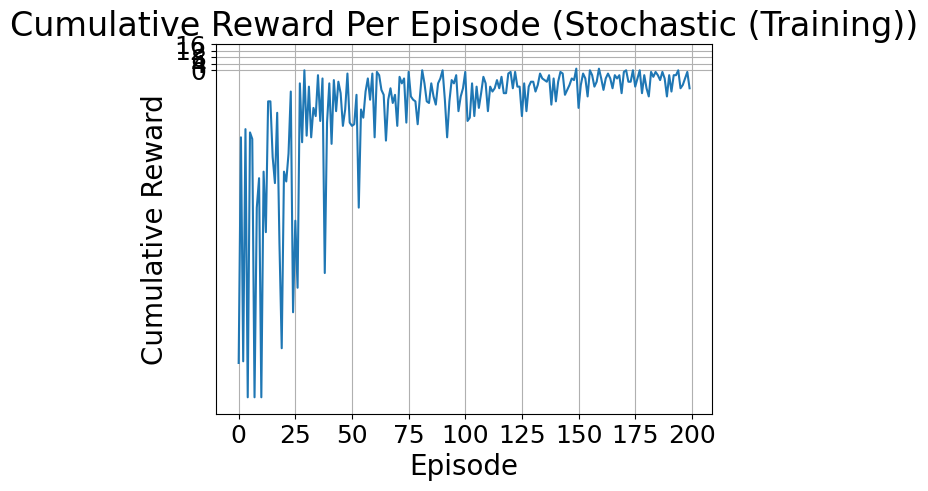

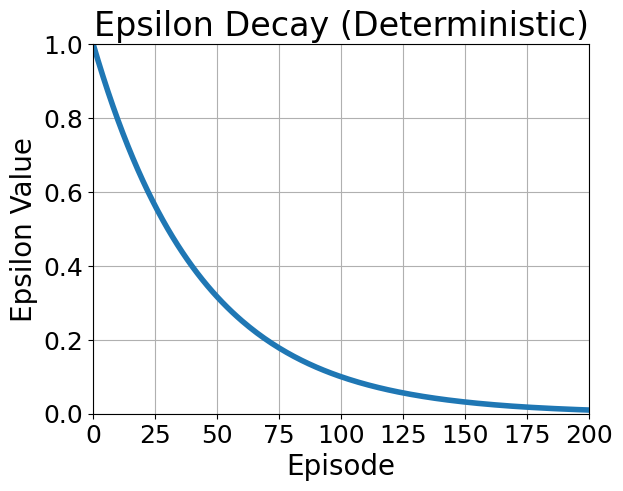

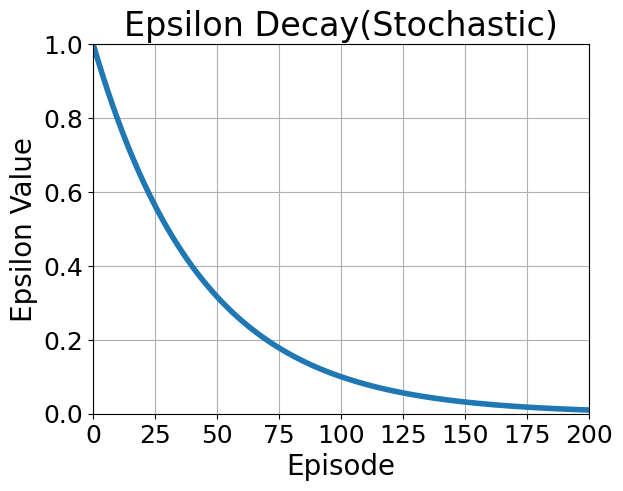

Streaming output truncated to the last 5000 lines.
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.

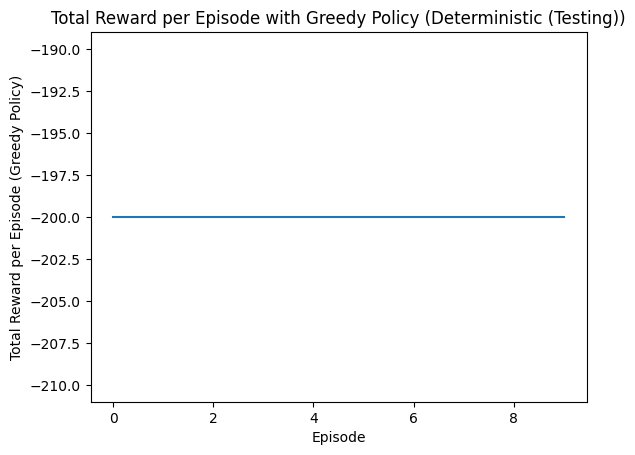

Streaming output truncated to the last 5000 lines.
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0. 111.

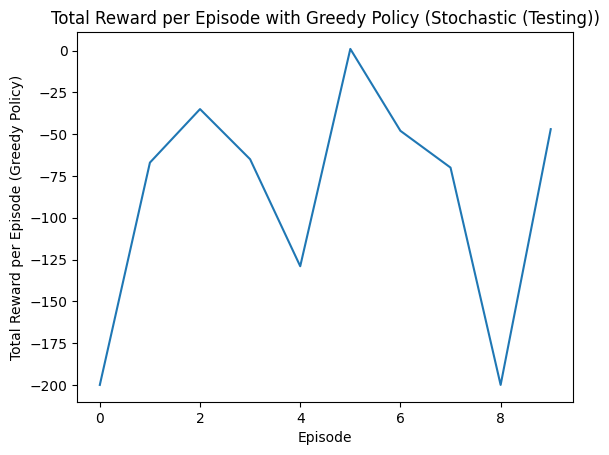

In [47]:
Q, D_rewards,D_epsilon_Values = Q_logic_d(my_env_1,200,0.3)
Q_updated, S_rewards, S_epsilon_values = Q_logic_s(my_env_2,200,0.3)
def my_greedy_policy(env, Q, num_episodes=10):
    rewards_per_episode = []
    end_loop = 0
    while end_loop < num_episodes:
        total_reward = 0
        state = env.reset()
        if isinstance(state, int):
            state = (state,)
        while True:
            action = np.argmax(Q[tuple(state)])
            next_state, reward, terminated, _ = env.step(action)
            total_reward += reward
            state = next_state
            if terminated == True:
                break
        rewards_per_episode.append(total_reward)
        end_loop = end_loop + 1
    return rewards_per_episode
og_Q = np.zeros((36,4))
print("Initial Table:",og_Q)
for d_key, d_value in Q.items():
  print("Deterministic Q-table", d_value )
for s_key, s_value in Q_updated_dictionary.items():
  print("Stochastic Q-table", s_value)
# Deterministic Environment
plt.figure()
plt.plot(D_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Deterministic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Stochastic Environment
plt.figure()
plt.plot(S_rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Stochastic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Epsilon Decay Graph
# Deterministic Environment
plt.figure()
plt.plot(D_epsilon_Values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay (Deterministic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=200)
plt.grid()
plt.show()
# Stochastic Environement
plt.figure()
plt.plot(S_epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay(Stochastic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=200)
plt.grid()
plt.show()
# 10 Step verification
# Deterministic Environment
my_env_1 = Deterministic_Environment()
greedy_rewards = my_greedy_policy(my_env_1, Q)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Deterministic (Testing))')
plt.show()
#Stochastic Environment
my_env_2 = Stochastic_Environment()
greedy_rewards = my_greedy_policy(my_env_2, Q_updated)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Stochastic (Testing))')
plt.show()

# **2.2. SARSA**

In [48]:
# Deterministic Environment
import pickle
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict
import pandas as pd


class Deterministic_Environment(gym.Env):
    metadata = { 'render.modes': [] }
    def __init__(self):
      self.observation_space = spaces.Discrete(36)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = 200
      self.timestep = 0
      self.agent_pos = [0, 0]
      self.reward_pos_1 = [3,3]
      self.reward_pos_2 = [1,2]
      self.reward_pos_3 = [5,0]
      self.reward_pos_4 = [0,5]
      self.goal_pos = [5, 5]
      self.state = np.zeros((6,6))
      self.state[tuple(self.agent_pos)] = 111
      self.state[tuple(self.goal_pos)] = 888

    def reset(self, **kwargs):
      self.agent_pos = [0, 0]
      self.reward_pos_1 = [3,3]
      self.reward_pos_2 = [1,2]
      self.reward_pos_3 = [5,0]
      self.reward_pos_4 = [0,5]
      self.goal_pos = [5, 5]
      self.timestep = 0
      self.state = np.zeros((6,6))
      self.state[tuple(self.agent_pos)] = 111
      self.state[tuple(self.goal_pos)] = 888
      observation = self.state.flatten()
      return observation

    def step(self, action):
      if action == 0: #Down
        self.agent_pos[0] += 1
      elif action == 1: #Up
        self.agent_pos[0] -= 1
      elif action == 2: #Right
        self.agent_pos[1] += 1
      elif action == 3: #Left
        self.agent_pos[1] -= 1
      self.agent_pos = np.clip(self.agent_pos, 0, 5)
      self.state = np.zeros((6,6))
      self.state[tuple(self.agent_pos)] = 111
      self.state[tuple(self.goal_pos)] = 888
      print("Current State:", self.state)
      observation = self.state.flatten()
      reward = 0
      truncated = False
      if np.array_equal(self.agent_pos, self.goal_pos):
        terminated = True
        reward = 10
      else:
        terminated = False
        reward = 0
        if np.array_equal(self.agent_pos, self.reward_pos_1) or np.array_equal(self.agent_pos, self.reward_pos_2):
          reward = 1
        elif np.array_equal(self.agent_pos, self.reward_pos_3) or np.array_equal(self.agent_pos, self.reward_pos_4):
          reward = -1
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
          terminated = True
        if np.all((np.asarray(self.agent_pos) >=0 ) & (np.asarray(self.agent_pos) <= 5)):
          truncated = True
          reward = -1
        else:
          truncated = False
      return observation, reward, terminated, truncated

    def render(self,agent_actions,ax=None):
      if ax is None:
        fig, ax = plt.subplots()
      my_grid_width = 6
      my_grid_height = 6
      grid = np.zeros((my_grid_height, my_grid_width))
      grid[tuple(self.goal_pos)] = 1
      grid[tuple(self.reward_pos_1)] = 0.5
      grid[tuple(self.reward_pos_2)] = 0.5
      grid[tuple(self.reward_pos_3)] = -0.5
      grid[tuple(self.reward_pos_4)] = -0.5
      for a_position in agent_actions:
        grid[tuple(a_position)] = 0
      ax.set_xticks(np.arange(-0.5, my_grid_width, 1), minor=True)
      ax.set_yticks(np.arange(-0.5, my_grid_height, 1), minor=True)
      ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
      ax.imshow(grid, cmap='binary', interpolation='nearest')
      ax.scatter(self.goal_pos[1], self.goal_pos[0], marker='o',edgecolors='white',linewidths=3, color='g', s=500, alpha=1)
      ax.scatter(self.reward_pos_1[1], self.reward_pos_1[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
      ax.scatter(self.reward_pos_2[1], self.reward_pos_2[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
      ax.scatter(self.reward_pos_3[1], self.reward_pos_3[0], marker='X', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
      ax.scatter(self.reward_pos_4[1], self.reward_pos_4[0], marker='X', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
      ax.scatter(agent_actions[-1][1], agent_actions[-1][0], marker='$\U0001F60D$',edgecolors='k',linewidths=1, color='yellow', s=1000, alpha=1)
      plt.show()

def SARSA_logic_d(env, num_of_episodes, gamma, alpha=0.1):
    epsilon_initial = 1
    epsilon_final = 0.01
    epsilon_decay_rate = (epsilon_final / epsilon_initial) ** (1 / num_of_episodes)
    D_epsilon_values = []
    new_epsilon = epsilon_initial
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards_gained_per_episode = []
    D_epsilon_values.append(new_epsilon)
    for episode in range(num_of_episodes):
        current_state = env.reset()
        done = False
        cummulative_reward = 0
        if np.random.rand() < new_epsilon:
            current_action = np.random.randint(env.action_space.n)
        else:
            current_action = np.argmax(Q[tuple(current_state)])
        while not done:
            next_state, reward, terminated, truncated = env.step(current_action)
            if np.random.rand() < new_epsilon:
                next_action = np.random.randint(env.action_space.n)
            else:
                next_action = np.argmax(Q[tuple(next_state)])
            Q[tuple(current_state)][current_action] += alpha * (reward + gamma * Q[tuple(next_state)][next_action] - Q[tuple(current_state)][current_action])
            cummulative_reward += reward
            current_state = next_state
            current_action = next_action
            if terminated == True:
                break
        rewards_gained_per_episode.append(cummulative_reward)
        if episode > 0:
            new_epsilon = new_epsilon * epsilon_decay_rate
            D_epsilon_values.append(new_epsilon)
    return dict(Q), rewards_gained_per_episode, D_epsilon_values

my_env_1 = Deterministic_Environment()
Q_SARSA_D, SARSA_rewards_D, SARSA_epsilon_values_D = SARSA_logic_d(my_env_1, 5000, 0.9)
with open('SARSA_deterministic_q_table.pkl', 'wb') as f:
    pickle.dump(Q_SARSA_D, f)
#i am doing this for my reference
Q_SARSA_df = pd.DataFrame.from_dict(Q_SARSA_D, orient='index')
Q_SARSA_df.to_csv('SARSA_deterministic_q_table.csv')

Streaming output truncated to the last 5000 lines.
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 111.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 111.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.

In [50]:
#Stochastic Environment
import numpy as np
import pandas as pd
import gym
from gym import spaces
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict

class Stochastic_Environment(gym.Env):
    metadata = { 'render.modes': [] }

    def __init__(self,stochastic_action=0.05):
        self.observation_space = spaces.Discrete(36)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 200
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.reward_pos_1 = [3,3]
        self.reward_pos_2 = [1,2]
        self.reward_pos_3 = [5,0]
        self.reward_pos_4 = [0,5]
        self.goal_pos = [5, 5]
        self.state = np.zeros((6,6))
        self.state[tuple(self.agent_pos)] = 111
        self.state[tuple(self.goal_pos)] = 888
        self.stochastic_action = stochastic_action
    def reset(self, **kwargs):
        self.agent_pos = [0, 0]
        self.timestep = 0
        self.state = np.zeros((6,6))
        self.state[tuple(self.agent_pos)] = 111
        self.state[tuple(self.goal_pos)] = 888
        observation = self.state.flatten()
        return observation
    def step(self, action):
        if np.random.rand() < self.stochastic_action:
            alternate_action = [act for act in range(self.action_space.n) if act != action]
            action = np.random.choice(alternate_action)
            print("Its a Stochastic Move")
            print("Alternate Action", action)
        if action == 0: #Down
            self.agent_pos[0] += 1
        elif action == 1: #Up
            self.agent_pos[0] -= 1
        elif action == 2: #Right
            self.agent_pos[1] += 1
        elif action == 3: #Left
            self.agent_pos[1] -= 1
        self.agent_pos = np.clip(self.agent_pos, 0, 5)
        self.state = np.zeros((6,6))
        self.state[tuple(self.agent_pos)] = 111
        self.state[tuple(self.goal_pos)] = 888
        print("Current State:", self.state)
        observation = self.state.flatten()
        reward = 0
        truncated = False
        if np.array_equal(self.agent_pos, self.goal_pos):
            terminated = True
            reward = 10
        else:
            terminated = False
            reward = 0
            if np.array_equal(self.agent_pos, self.reward_pos_1) or np.array_equal(self.agent_pos, self.reward_pos_2):
              reward = 1
            elif np.array_equal(self.agent_pos, self.reward_pos_3) or np.array_equal(self.agent_pos, self.reward_pos_4):
              reward = -1
            self.timestep += 1
            if self.timestep >= self.max_timesteps:
              terminated = True
            if np.all((np.asarray(self.agent_pos) >=0 ) & (np.asarray(self.agent_pos) <= 5)):
              truncated = True
              reward = -1
            else:
              truncated = False
        return observation, reward, terminated, truncated
    def render(self,agent_actions,ax=None):
        if ax is None:
            fig, ax = plt.subplots()
        my_grid_width = 6
        my_grid_height = 6
        grid = np.zeros((my_grid_height, my_grid_width))
        grid[tuple(self.goal_pos)] = 1
        grid[tuple(self.reward_pos_1)] = 0.5
        grid[tuple(self.reward_pos_2)] = 0.5
        grid[tuple(self.reward_pos_3)] = -0.5
        grid[tuple(self.reward_pos_4)] = -0.5
        for a_position in agent_actions:
            grid[tuple(a_position)] = 0
        ax.set_xticks(np.arange(-0.5, my_grid_width, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, my_grid_height, 1), minor=True)
        ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
        ax.imshow(grid, cmap='binary', interpolation='nearest')
        ax.scatter(self.goal_pos[1], self.goal_pos[0], marker='o',edgecolors='white',linewidths=3, color='g', s=500, alpha=1)
        ax.scatter(self.reward_pos_1[1], self.reward_pos_1[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
        ax.scatter(self.reward_pos_2[1], self.reward_pos_2[0], marker='d', edgecolors='k', linewidths=3,
                   color='c', s=500, alpha=1)
        ax.scatter(self.reward_pos_3[1], self.reward_pos_3[0], marker='X', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
        ax.scatter(self.reward_pos_4[1], self.reward_pos_4[0], marker='X', edgecolors='k', linewidths=3,
                   color='r', s=500, alpha=1)
        ax.scatter(agent_actions[-1][1], agent_actions[-1][0], marker='$\U0001F60D$',edgecolors='k',linewidths=1, color='yellow', s=1000, alpha=1)
        plt.show()

def SARSA_logic_s(env, num_of_episodes, gamma, alpha=0.1):
    epsilon_initial = 1
    epsilon_final = 0.01
    epsilon_decay_rate = (epsilon_final / epsilon_initial) ** (1 / num_of_episodes)
    S_epsilon_values = []
    new_epsilon = epsilon_initial
    S_epsilon_values.append(new_epsilon)
    Q_initial = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards_gained_per_episode = []
    for episode in range(num_of_episodes):
        current_state = env.reset()
        done = False
        cumulative_reward = 0
        if np.random.rand() < new_epsilon:
            current_action = np.random.randint(env.action_space.n)
        else:
            current_action = np.argmax(Q_initial[tuple(current_state)])
        while not done:
            next_state, reward, terminated, _ = env.step(current_action)
            if np.random.rand() < new_epsilon:
                next_action = np.random.randint(env.action_space.n)
            else:
                next_action = np.argmax(Q_initial[tuple(next_state)])
            Q_initial[tuple(current_state)][current_action] += alpha * (reward + gamma * Q_initial[tuple(next_state)][next_action] - Q_initial[tuple(current_state)][current_action])
            cumulative_reward += reward
            current_state = next_state
            current_action = next_action
            if terminated:
                break
        if episode > 0:
            new_epsilon = new_epsilon * epsilon_decay_rate
            S_epsilon_values.append(new_epsilon)
        rewards_gained_per_episode.append(cumulative_reward)
    return Q_initial, rewards_gained_per_episode, S_epsilon_values

my_env_2 = Stochastic_Environment()
Q_updated_SARSA_S, SARSA_rewards_S, SARSA_epsilon_values_S = SARSA_logic_s(my_env_2, 5000, 0.9)
Q_updated_SARSA_dictionary = {key: value for key, value in Q_updated_SARSA_S.items()}
with open('Stochastic_SARSA_q_table.pkl', 'wb') as f:
    pickle.dump(Q_updated_SARSA_dictionary, f)
# i am doing this for my reference
Q_updated_SARSA_df = pd.DataFrame.from_dict(Q_updated_SARSA_S, orient='index')
Q_updated_SARSA_df.columns = ['Action 0', 'Action 1', 'Action 2', 'Action 3']
Q_updated_SARSA_df.to_csv('Stochastic_SARSA_q_table.csv', index=False)


Streaming output truncated to the last 5000 lines.
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.

**BASE Model**

Initial Table: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Deterministic Q-table [-2.38677755 -3.34333567 -3.74752034 -3.57471493]
Deterministic Q-table [-6.13705908 -6.89670575 -2.84670001 -5.10364769]
Deterministic Q-table [-1.41492825 -6.23941722 -6.72722782 -6.72521759]
Deterministic Q-table [-0.05882171 -5.61243583 -3.17690192 -5.61633248]
Deterministic Q-table [-6.89243308 -7.16534859 -5.79138279 -7.77693707]
Deterministic Q-table [-0.89136529 -7.41108976 -5.60226485 -6.80399753]
Deterministi

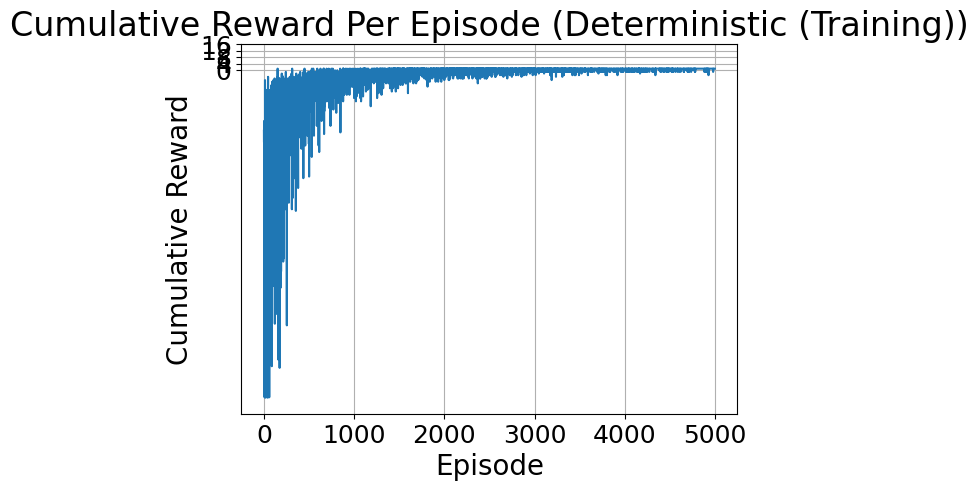

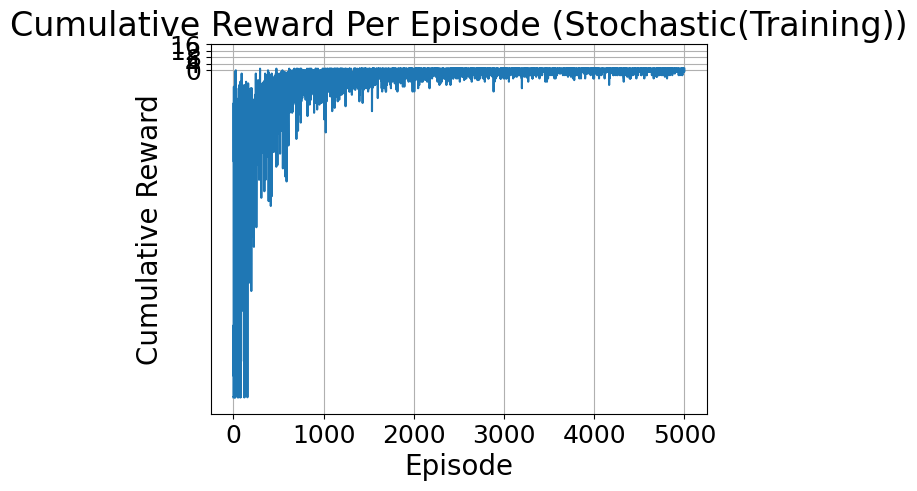

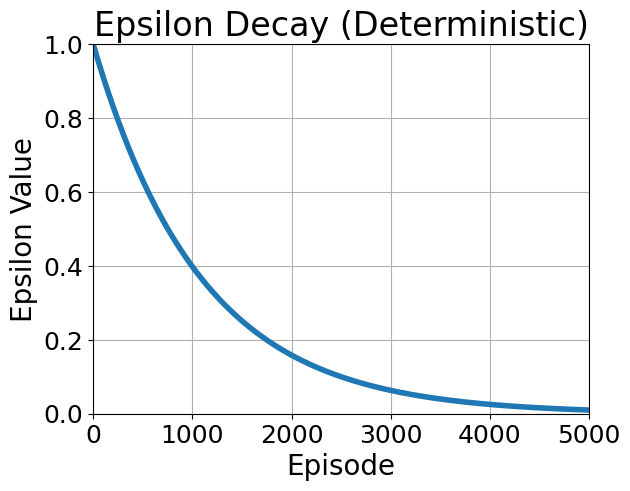

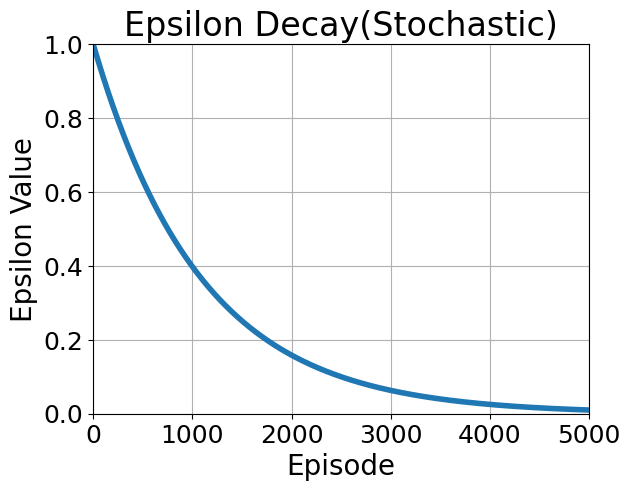

Current State: [[  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [111.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0

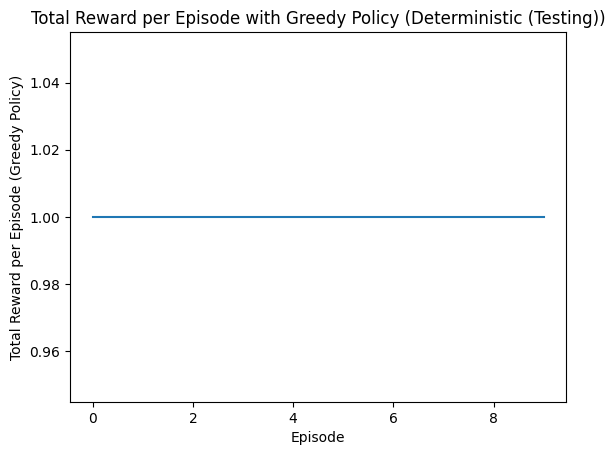

Current State: [[  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. 111.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 888.]]
Current State: [[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 111.   0.   0.]
 [  0.   0.   0.   0.   0.   0

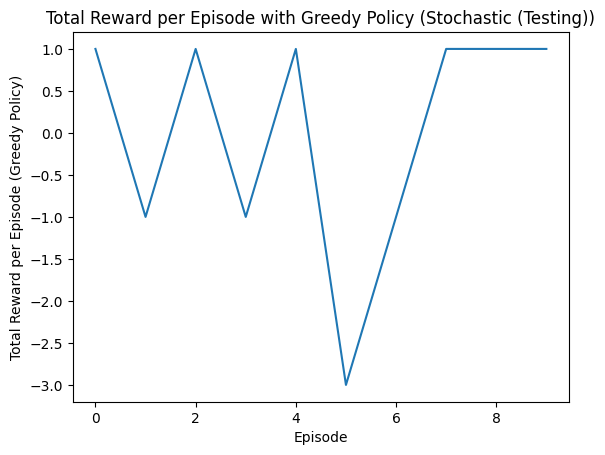

In [51]:

def my_greedy_policy(env, Q, num_episodes=10):
    rewards_per_episode = []
    end_loop = 0
    while end_loop < num_episodes:
        total_reward = 0
        state = env.reset()
        if isinstance(state, int):
            state = (state,)
        while True:
            action = np.argmax(Q[tuple(state)])
            next_state, reward, terminated, _ = env.step(action)
            total_reward += reward
            state = next_state
            if terminated == True:
                break
        rewards_per_episode.append(total_reward)
        end_loop = end_loop + 1
    return rewards_per_episode
og_Q = np.zeros((36,4))
print("Initial Table:",og_Q)
for d_key, d_value in Q_SARSA_D.items():
  print("Deterministic Q-table", d_value )
for s_key, s_value in Q_updated_SARSA_S.items():
  print("Stochastic Q-table", s_value)
# Deterministic Environment
plt.figure()
plt.plot(SARSA_rewards_D)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Deterministic (Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Stochastic Environment
plt.figure()
plt.plot(SARSA_rewards_S)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Stochastic(Training))', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([0, 4, 8, 12, 16], fontsize=18)
plt.grid()
plt.show()
# Epsilon Decay Graph
# Deterministic Environment
plt.figure()
plt.plot(SARSA_epsilon_values_D, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay (Deterministic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=5000)
plt.grid()
plt.show()
# Stochastic Environement
plt.figure()
plt.plot(SARSA_epsilon_values_S, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay(Stochastic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=5000)
plt.grid()
plt.show()
# 10 Step verification
# Deterministic Environment
my_env_1 = Deterministic_Environment()
greedy_rewards = my_greedy_policy(my_env_1, Q_SARSA_D)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Deterministic (Testing))')
plt.show()
#Stochastic Environment
my_env_2 = Stochastic_Environment()
greedy_rewards = my_greedy_policy(my_env_2, Q_updated_SARSA_S)
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy Policy)')
plt.title('Total Reward per Episode with Greedy Policy (Stochastic (Testing))')
plt.show()

# **# 3. Stock - Trade Environment**

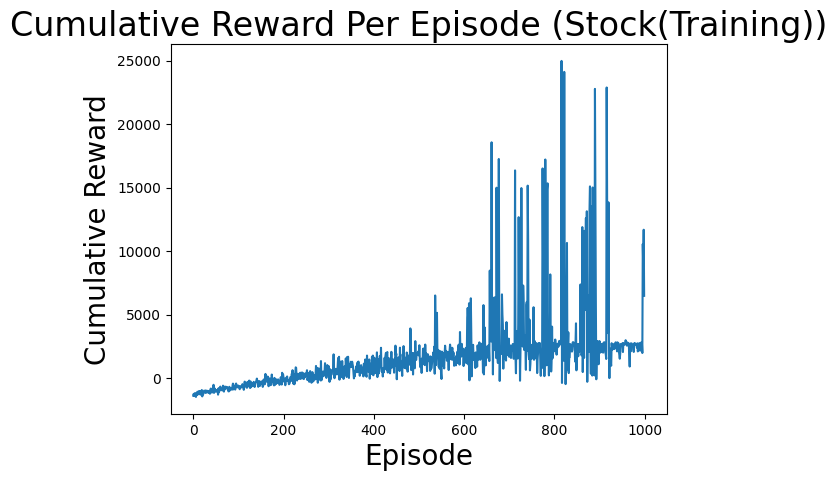

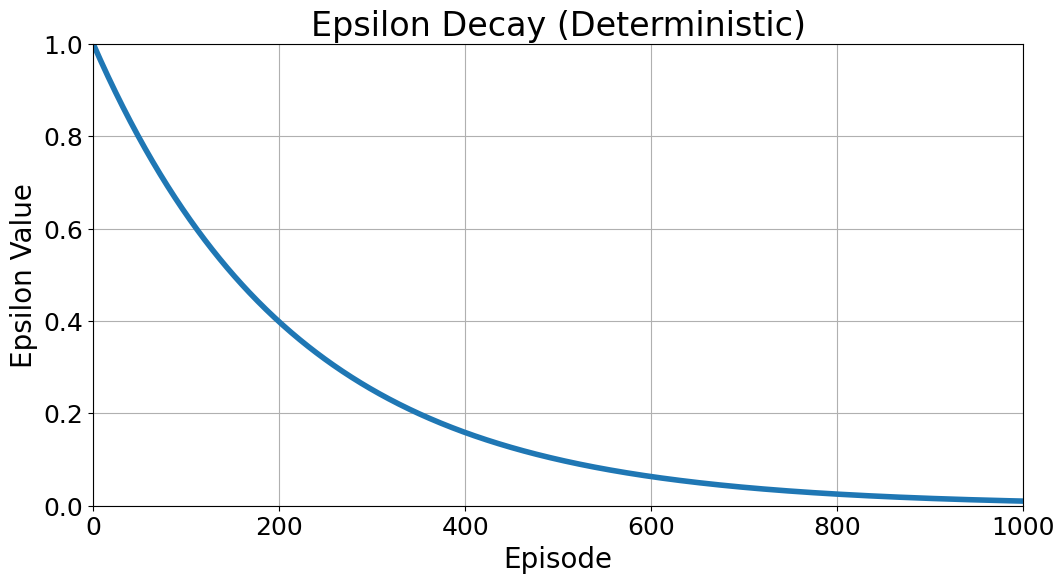

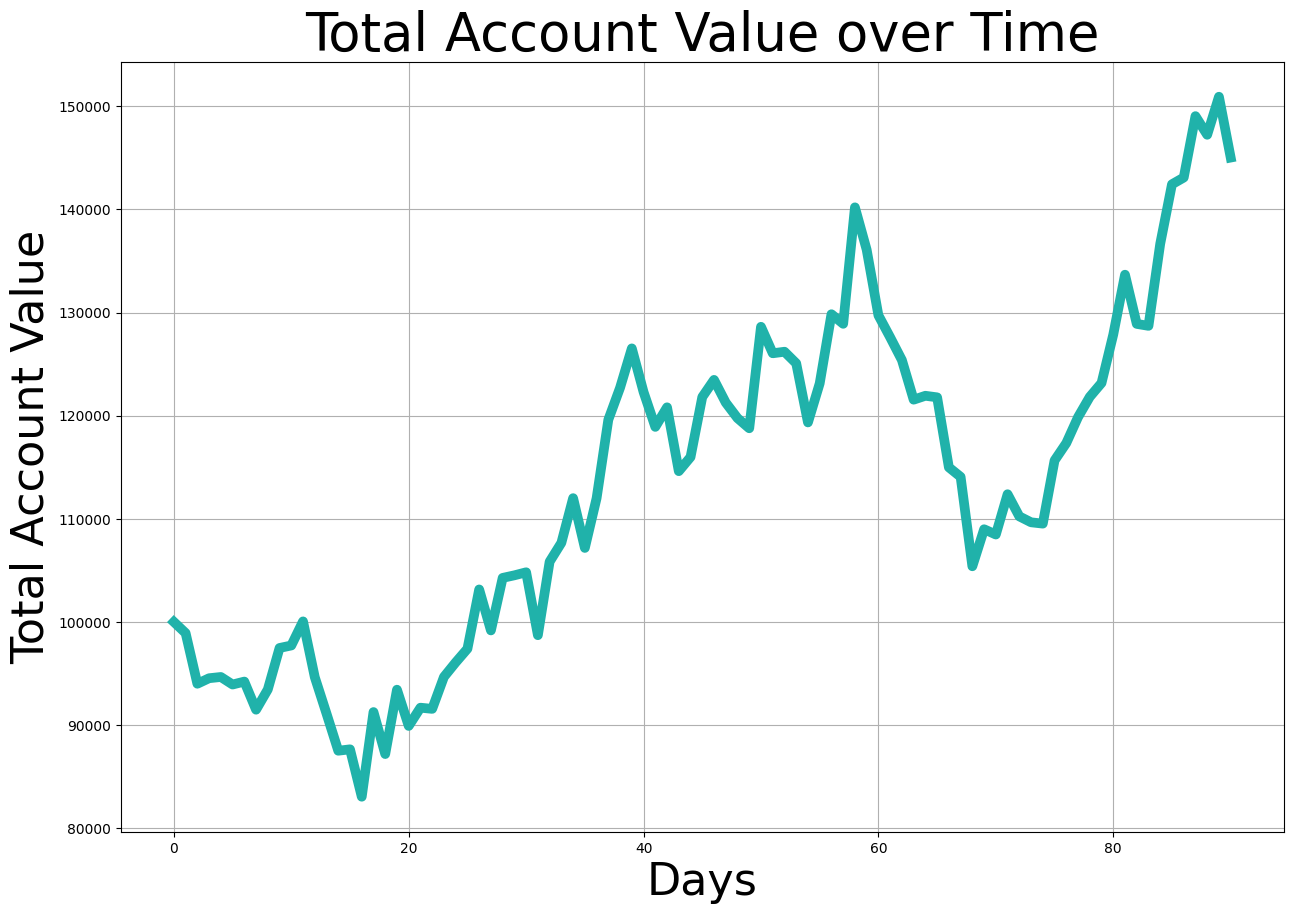

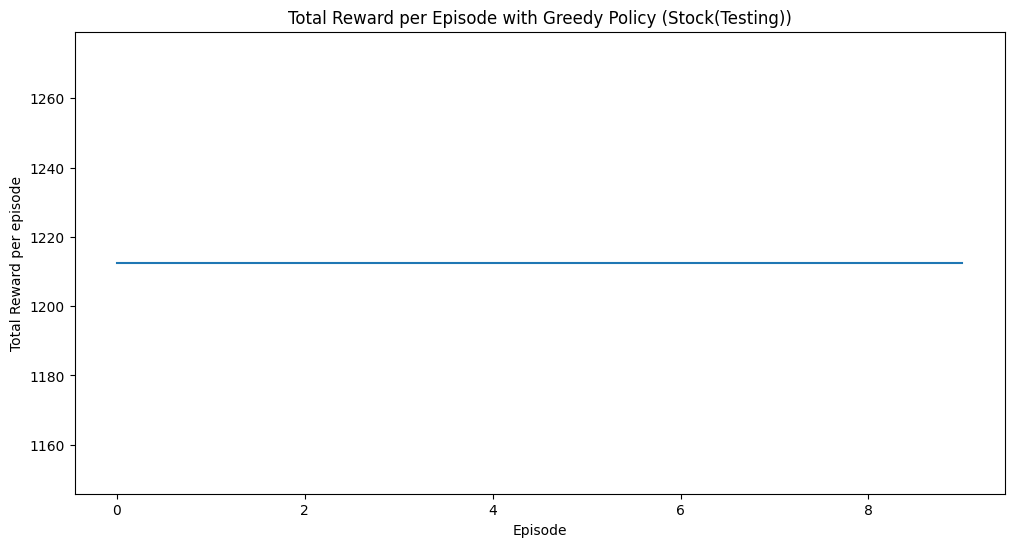

In [70]:
# Imports
import gymnasium
from gymnasium import spaces
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import pickle


# Defining the Stock Trading Environment.
"""DON'T MAKE ANY CHANGES TO THE ENVIRONMENT."""


class StockTradingEnvironment(gymnasium.Env):
    """This class implements the Stock Trading environment."""

    def __init__(self, file_path, train=True, number_of_days_to_consider=10):
        """This method initializes the environment.

        :param file_path: - Path of the CSV file containing the historical stock data.
        :param train: - Boolean indicating whether the goal is to train or test the performance of the agent.
        :param number_of_days_to_consider = Integer representing the number of days the for which the agent
                considers the trend in stock price to make a decision."""

        self.file_path = file_path
        self.stock_data = pd.read_csv(self.file_path)
        self.train = train

        # Splitting the data into train and test datasets.
        self.training_stock_data = self.stock_data.iloc[:int(0.8 * len(self.stock_data))]
        self.testing_stock_data = self.stock_data.iloc[int(0.8 * len(self.stock_data)):].reset_index()

        self.observation_space = spaces.Discrete(4)
        self.action_space = spaces.Discrete(3)

        self.investment_capital = 100000  # This defines the investment capital that the agent starts with.
        self.number_of_shares = 0  # This defines number of shares currently held by the agent.
        self.stock_value = 0  # This defines the value of the stock currently held by the agent.
        self.book_value = 0  # This defines the total value for which the agent bought the shares.
        # This defines the agent's total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # List to store the total account value over training or evaluation.
        self.total_account_value_list = []
        # This defines the number of days for which the agent considers the data before taking an action.
        self.number_of_days_to_consider = number_of_days_to_consider
        # The maximum timesteps the agent will take before the episode ends.
        if self.train:
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider
        else:
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider
        # Initializing the number of steps taken to 0.
        self.timestep = 0
        self.reset()

    def reset(self):
        """This method resets the environment and returns the observation.

        :returns observation: - Integer in the range of 0 to 3 representing the four possible observations that the
                                agent can receive. The observation depends upon whether the price increased on average
                                in the number of days the agent considers, and whether the agent already has the stock
                                or not.

                 info: - info: - A dictionary that can be used to provide additional implementation information."""

        self.investment_capital = 100000  # This defines the investment capital that the agent starts with.
        self.number_of_shares = 0  # This defines number of shares currently held by the agent.
        self.stock_value = 0  # This defines the value of the stock currently held by the agent.
        self.book_value = 0  # This defines the total value for which the agent bought the shares.
        # This defines the agent's total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # List to store the total account value over training or evaluation.
        self.total_account_value_list = []
        # Initializing the number of steps taken to 0.
        self.timestep = 0

        # Getting the observation vector.
        if self.train:
            # If the task is to train the agent the maximum timesteps will be equal to the number of days considered
            # subtracted from the  length of the training stock data.
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.training_stock_data['Close'][self.timestep + 1 + i] \
                        - self.training_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            stock_held = False

            # Observation vector that will be passed to the agent.
            observation = [price_increase, stock_held]

        else:
            # If the task is to evaluate the trained agent's performance the maximum timesteps will be equal to the
            # number of days considered subtracted from the  length of the testing stock data.
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.testing_stock_data['Close'][self.timestep + 1 + i] \
                        - self.testing_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            stock_held = False

            # Observation vector.
            observation = [price_increase, stock_held]

        if np.array_equal(observation, [True, False]):
            observation = 0
        if np.array_equal(observation, [True, True]):
            observation = 1
        if np.array_equal(observation, [False, False]):
            observation = 2
        if np.array_equal(observation, [False, True]):
            observation = 3

        info = None

        return observation, info

    def step(self, action):
        """This method implements what happens when the agent takes the action to Buy/Sell/Hold.

        :param action: - Integer in the range 0 to 2 inclusive.

        :returns observation: - Integer in the range of 0 to 3 representing the four possible observations that the
                                agent can receive. The observation depends upon whether the price increased on average
                                in the number of days the agent considers, and whether the agent already has the stock
                                or not.
                 reward: - Integer/Float value that's used to measure the performance of the agent.
                 terminated: - Boolean describing whether the episode has terminated.
                 truncated: - Boolean describing whether a truncation condition outside the scope of the MDP is satisfied.
                 info: - A dictionary that can be used to provide additional implementation information."""

        # We give the agent a penalty for taking actions such as buying a stock when the agent doesn't have the
        # investment capital and selling a stock when the agent doesn't have any shares.
        penalty = 0

        if self.train:
            if action == 0:  # Buy
                if self.number_of_shares > 0:
                    penalty = -10
                # Determining the number of shares the agent can buy.
                number_of_shares_to_buy = math.floor(self.investment_capital / self.training_stock_data[
                    'Open'][self.timestep + self.number_of_days_to_consider])
                # Adding to the number of shares the agent has.
                self.number_of_shares += number_of_shares_to_buy

                # Computing the stock value, book value, investment capital and reward.
                if number_of_shares_to_buy > 0:
                    self.stock_value +=\
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.book_value += \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider]\
                        * number_of_shares_to_buy
                    self.investment_capital -= \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy

                    reward = 1 + penalty

                else:
                    # Computing the stock value and reward.
                    self.stock_value = \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * self.number_of_shares
                    reward = -10

            if action == 1:  # Sell
                # Computing the investment capital, sell value and reward.
                self.investment_capital += \
                    self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                    * self.number_of_shares
                sell_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                             * self.number_of_shares

                if self.book_value > 0:
                    reward = (sell_value - self.book_value) / self.book_value * 100
                else:
                    reward = -10

                self.number_of_shares = 0
                self.stock_value = 0
                self.book_value = 0

            if action == 2:  # Hold
                # Computing the stock value and reward.
                self.stock_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                                   * self.number_of_shares

                if self.book_value > 0:
                    reward = (self.stock_value - self.book_value) / self.book_value * 100
                else:
                    reward = -1

        else:
            if action == 0:  # Buy
                if self.number_of_shares > 0:
                    penalty = -10
                # Determining the number of shares the agent can buy.
                number_of_shares_to_buy = math.floor(self.investment_capital / self.testing_stock_data[
                    'Open'][self.timestep + self.number_of_days_to_consider])
                # Adding to the number of shares the agent has.
                self.number_of_shares += number_of_shares_to_buy

                # Computing the stock value, book value, investment capital and reward.
                if number_of_shares_to_buy > 0:
                    self.stock_value += \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.book_value += \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.investment_capital -= \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy

                    reward = 1 + penalty

                else:
                    # Computing the stock value and reward.
                    self.stock_value = self.training_stock_data['Open'][
                                           self.timestep + self.number_of_days_to_consider] * self.number_of_shares
                    reward = -10

            if action == 1:  # Sell
                # Computing the investment capital, sell value and reward.
                self.investment_capital += \
                    self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                    * self.number_of_shares
                sell_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                             * self.number_of_shares

                if self.book_value > 0:
                    reward = (sell_value - self.book_value) / self.book_value * 100
                else:
                    reward = -10

                self.number_of_shares = 0
                self.stock_value = 0
                self.book_value = 0

            if action == 2:  # Hold
                # Computing the stock value and reward.
                self.stock_value = self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                                   * self.number_of_shares

                if self.book_value > 0:
                    reward = (self.stock_value - self.book_value) / self.book_value * 100
                else:
                    reward = -1

        # Determining if the agent currently has shares of the stock or not.
        if self.number_of_shares > 0:
            stock_held = True
        else:
            stock_held = False

        # Getting the observation vector.
        if self.train:
            # If the task is to train the agent the maximum timesteps will be equal to the number of days considered
            # subtracted from the  length of the training stock data.
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.training_stock_data['Close'][self.timestep + 1 + i] \
                        - self.training_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            # Observation vector.
            observation = [price_increase, stock_held]

        else:
            # If the task is to evaluate the trained agent's performance the maximum timesteps will be equal to the
            # number of days considered subtracted from the  length of the testing stock data.
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.testing_stock_data['Close'][self.timestep + 1 + i] \
                        - self.testing_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            # Observation vector.
            observation = [price_increase, stock_held]

        self.timestep += 1  # Increasing the number of steps taken by the agent by 1.

        if np.array_equal(observation, [True, False]):
            observation = 0
        if np.array_equal(observation, [True, True]):
            observation = 1
        if np.array_equal(observation, [False, False]):
            observation = 2
        if np.array_equal(observation, [False, True]):
            observation = 3

        # Computing the total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # Appending the total account value of the list to plot the graph.
        self.total_account_value_list.append(self.total_account_value)

        # The episode terminates when the maximum timesteps have been reached.
        terminated = True if (self.timestep >= self.max_timesteps) \
            else False
        truncated = False
        info = {}

        return observation, reward, terminated, truncated, info

    def render(self, mode='human'):
        """This method renders the agent's total account value over time.

        :param mode: 'human' renders to the current display or terminal and returns nothing."""

        plt.figure(figsize=(15, 10))
        plt.plot(self.total_account_value_list, color='lightseagreen', linewidth=7)
        plt.xlabel('Days', fontsize=32)
        plt.ylabel('Total Account Value', fontsize=32)
        plt.title('Total Account Value over Time', fontsize=38)
        plt.grid()
        plt.show()


def Q_learning(env, num_of_episodes, gamma, alpha=0.1):
    epsilon_initial = 1
    epsilon_final = 0.01
    epsilon_decay_rate = (epsilon_final / epsilon_initial) ** (1 / num_of_episodes)
    epsilon_values = []
    new_epsilon = epsilon_initial
    epsilon_values.append(new_epsilon)
    Q_initial = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards_per_episode = []

    for episode in range(num_of_episodes):
        state, _ = env.reset()
        done = False
        cumulative_reward = 0

        while not done:
            if np.random.rand() < new_epsilon:
                action = np.random.randint(env.action_space.n)
            else:
                action = np.argmax(Q_initial[state])

            next_state, reward, done, truncated, info = env.step(action)
            best_next_action = np.argmax(Q_initial[next_state])
            Q_initial[state][action] += alpha * (
                reward + gamma * Q_initial[next_state][best_next_action] - Q_initial[state][action]
            )
            cumulative_reward += reward
            state = next_state

        if episode > 0:
            new_epsilon *= epsilon_decay_rate
            epsilon_values.append(new_epsilon)

        rewards_per_episode.append(cumulative_reward)

    return Q_initial, rewards_per_episode, epsilon_values

# Evaluation function
def evaluate_policy(env, Q, num_episodes=10):
    rewards_per_episode = []

    for _ in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = np.argmax(Q[state])
            next_state, reward, done, truncated, info = env.step(action)
            total_reward += reward
            state = next_state
        rewards_per_episode.append(total_reward)

    return rewards_per_episode


file_path = 'NVDA.csv'
env = StockTradingEnvironment(file_path, train=True)
# Training
num_episodes = 1000
gamma = 0.9
Q, rewards, epsilon_values = Q_learning(env, num_episodes, gamma)
with open('stock_Q_table.pkl', 'wb') as f:
    pickle.dump(dict(Q), f)
#rewards (Training)
plt.plot(rewards)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Stock(Training))', fontsize=24)
plt.show()
#Epsilon Decay
plt.figure(figsize=(12, 6))
plt.plot(epsilon_values, linewidth = 4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay (Deterministic)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()
# Testing
env_test = StockTradingEnvironment(file_path, train=False)
test_rewards = evaluate_policy(env_test, Q)
env_test.render()
# Plot testing rewards
plt.figure(figsize=(12, 6))
plt.plot(test_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per episode')
plt.title('Total Reward per Episode with Greedy Policy (Stock(Testing))')
plt.show()














